In [84]:

from bs4 import BeautifulSoup
import re,codecs
import os
import csv
import nltk
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup as bs
import re,time,os,codecs
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
 #generate random seed 
import random
seed = 666
random.seed(seed) 
from time import sleep
# import method to calculate metrics
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
# import method for split train/test data set
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# To get performance metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import svm
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV


In [85]:
def login(username,password):
    #access website
    try:
        driver.get('https://www.facebook.com/')
        
        #Accessing Login frame
        form=driver.find_element_by_id('login_form')
        form.click()
        
        #Entering email details
        email = form.find_element_by_id('email')
        email.send_keys(username)
        #time.sleep(1)
        
        #Entering password details
        pwd = form.find_element_by_id('pass')
        pwd.send_keys(password)
        time.sleep(1)
        
        #Clicking the login button
        button=WebDriverWait(driver, 1000).until(EC.element_to_be_clickable((By.ID, 'loginbutton')))
        button.click()
        
    except Exception as e:
        print('Exception encountered during Login')
        print(e)
        

In [86]:
def scrapData(url,html):
    try:
        driver.get(url)
        time.sleep(3)

 # Selenium script to scroll to the bottom, wait 3 seconds for the next batch of data to load, then continue scrolling.  It will continue to do this until the page stops loading new data.
        lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        noOfPageScrolls=0
        while(noOfPageScrolls < 50):
            print("noOfPageScrolls: ",noOfPageScrolls)
            time.sleep(3)
            lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
            print(lenOfPage)
            noOfPageScrolls=noOfPageScrolls+1

 # Now that the page is fully scrolled, grab the source code.
        source_data = driver.page_source

 # Passing page source into BeautifulSoup to start parsing
        bs_data = bs(source_data)

    except Exception as e:
        print('Exception getting the Page Source')
        print(e)
    try:
        with codecs.open(html,'w',encoding='utf8') as fw: fw.write(str(bs_data))
        fw.close()
    except Exception as e:
        print('Exception writing the Page Source into File')
        print(e)


In [87]:
driver = webdriver.Chrome()
login("defa2282@gmail.com","qwerty12345",)
scrapData("https://www.facebook.com/pg/ATT/community/?ref=page_internal",'Att_reviews.html')


noOfPageScrolls:  0
6715
noOfPageScrolls:  1
11037
noOfPageScrolls:  2
15447
noOfPageScrolls:  3
20894
noOfPageScrolls:  4
24914
noOfPageScrolls:  5
29592
noOfPageScrolls:  6
33283
noOfPageScrolls:  7
36924
noOfPageScrolls:  8
39543
noOfPageScrolls:  9
43200
noOfPageScrolls:  10
45826
noOfPageScrolls:  11
47451
noOfPageScrolls:  12
50606
noOfPageScrolls:  13
54928
noOfPageScrolls:  14
58476
noOfPageScrolls:  15
61184
noOfPageScrolls:  16
65966
noOfPageScrolls:  17
70410
noOfPageScrolls:  18
74430
noOfPageScrolls:  19
78492
noOfPageScrolls:  20
82434
noOfPageScrolls:  21
86633
noOfPageScrolls:  22
90960
noOfPageScrolls:  23
95254
noOfPageScrolls:  24
100152
noOfPageScrolls:  25
103921
noOfPageScrolls:  26
108232
noOfPageScrolls:  27
113411
noOfPageScrolls:  28
117795
noOfPageScrolls:  29
122314
noOfPageScrolls:  30
126769
noOfPageScrolls:  31
128794
noOfPageScrolls:  32
132522
noOfPageScrolls:  33
135213
noOfPageScrolls:  34
140387
noOfPageScrolls:  35
145058
noOfPageScrolls:  36
148887

C:\Users\PRIYANKA\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\PRIYANKA\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [88]:
scrapData("https://www.facebook.com/pg/TMobile/community/?ref=page_internal",'T-Mobile_reviews.html')

noOfPageScrolls:  0
10399
noOfPageScrolls:  1
14890
noOfPageScrolls:  2
20187
noOfPageScrolls:  3
25041
noOfPageScrolls:  4
30642
noOfPageScrolls:  5
35112
noOfPageScrolls:  6
38991
noOfPageScrolls:  7
44097
noOfPageScrolls:  8
48391
noOfPageScrolls:  9
54350
noOfPageScrolls:  10
60095
noOfPageScrolls:  11
62087
noOfPageScrolls:  12
67250
noOfPageScrolls:  13
72776
noOfPageScrolls:  14
78934
noOfPageScrolls:  15
82492
noOfPageScrolls:  16
87784
noOfPageScrolls:  17
93030
noOfPageScrolls:  18
99051
noOfPageScrolls:  19
103768
noOfPageScrolls:  20
108974
noOfPageScrolls:  21
113364
noOfPageScrolls:  22
118742
noOfPageScrolls:  23
122474
noOfPageScrolls:  24
126159
noOfPageScrolls:  25
129282
noOfPageScrolls:  26
132910
noOfPageScrolls:  27
136052
noOfPageScrolls:  28
140688
noOfPageScrolls:  29
145847
noOfPageScrolls:  30
150610
noOfPageScrolls:  31
155465
noOfPageScrolls:  32
160793
noOfPageScrolls:  33
165866
noOfPageScrolls:  34
171686
noOfPageScrolls:  35
177531
noOfPageScrolls:  36


C:\Users\PRIYANKA\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\PRIYANKA\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [89]:
def fetchReview(soup,file):
    reviews =[]
    #Beautiful soup to fetch the review
    reviewChunk=soup.findAll('div',{'class':(re.compile("_5pbx userContent"))}) 
    #print(reviewChunk)    
    with codecs.open(file, 'w',encoding='utf8') as fw: 
        if reviewChunk: 
            for review in reviewChunk:
                r=review.text.strip()
                fw.write(r)
                fw.write('\r\n')
                reviews.append(r)
    fw.close()
    return(reviews)


In [90]:
file = "Att_reviews.html"
with open(file, 'rb') as html:
    soup = BeautifulSoup(html, "lxml")
    reviews_att=fetchReview(soup,'review_data_att.txt')


In [91]:
file = 'T-Mobile_reviews.html'
with open(file, 'rb') as html:
    soup = BeautifulSoup(html, "lxml")
    reviews_Tmobile=fetchReview(soup,'review_data_T-Mobile.txt')


In [92]:
for i in range(0,10):
    print(reviews_att[i])
    print("*********************************************************")
    

I like how you advertise shows (it was him) as being on demand then it actually isn't. Compared to spectrum you have AWFUL on demand options, overpriced.
*********************************************************
Please like if you've ever been given the run around by AT&T and their "insurance" Asurion! I've wasted almost 3 hours today between the two of them telling me that they couldn't do anything, but the other one could.
*********************************************************
AT&T & Frontier Communications now look i don’t which one of y’all worst but i need a discount or something this month
*********************************************************
When will service be restored to the Murfreesboro TN area?  Been down all day and the ATT website's DSL troubleshooting link isn't working either.
*********************************************************
Ugh AT&T you fail me more than you should!Ugh AT&T you fail me more than you should!
**********************************************

In [93]:
for i in range(0,10):
    print(reviews_Tmobile[i])
    print("*********************************************************")
    

T-Mobile Tuesdays is the worst app. Every week it wants me to update then it won't update and now it's not accessible from play store or the internet. What the heck.
*********************************************************
Military/Vet Friends AND/OR Those with RECENT (1 Year ago or less) T-Mobile User Experience - With T-Mobile's new mllilitary deal PLUS the Sprint/T-Mobile merger,  I'm considering switching from Sprint.  Thoughts?  1. I'm out of contract... 2. My phone is paid off See More
*********************************************************
T-Mobile with this merger can you get better customer service. The outsourced call centers really are terrible.
*********************************************************
Hold up... Son for years, Sprint and T-Mobile had been driving down each other's prices and deals.  Then a couple of years ago, I noticed that they stopped. Now I'm seeing this... But let me run this through my logic centers.  "We are joining together, to make one big compa

In [94]:
def sentiment_analysis(text, positive_words, negative_words):
             
    sentiment=None
    
    posWordCount = 0
    negWordCount = 0

    tokens =  nltk.word_tokenize(text)

    print("\n")
    
    for idx, token in enumerate(tokens):
        if token in positive_words:
            if idx>0:
     #    - Positive words:
     #  * a positive word not preceded by a negation word (i.e. not, n't, no, cannot, neither, nor, too)
                if tokens[idx-1] not in negative_words:
                    posWordCount += 1
                else:
      #- Negative words:
      # * a positive word preceded by a negation word
                    negWordCount += 1
            else:
                posWordCount += 1
        elif (token in negative_words):
            if idx>0:
       #- Negative words:
      # * a negative word not preceded by a negation word
                if tokens[idx-1] not in negative_words:
                    negWordCount += 1
                else:
    # - Positive words:
      # * a negative word preceded by a negation word (ex -not bad)
                    posWordCount += 1
            else:
                negWordCount += 1
    
    if(posWordCount > negWordCount):
        sentiment = "positive"
    elif(posWordCount <= negWordCount):
        sentiment = "negative"
    
    return sentiment

In [95]:
def directData(reviews):
    #with open("review_data.txt") as f:
    sentiments_prediction=[]
    with open("positive-words.txt",'r') as f:
        positive_words=[line.strip() for line in f]
        
    with open("negative-words.txt",'r') as f:
        negative_words=[line.strip() for line in f]
    for review in reviews:
        sentiments_prediction.append(sentiment_analysis(review,positive_words,negative_words))
    return(sentiments_prediction) 
 

In [96]:
reviews_prediction_att=directData(reviews_att)
for item in range (0,6):
        print(reviews_att[item])
        print(reviews_prediction_att[item])
        print("******************************************************************")

























































































































































































































































































































































































































































































































































































































































































































































































I like how you advertise shows (it was him) as being on demand then it actually isn't. Compared to spectrum you have AWFUL on demand options, overpriced.
negative
******************************************************************
Please lik

In [97]:
reviews_prediction_Tmobile=directData(reviews_Tmobile)
for item in range (0,6):
        print(reviews_Tmobile[item])
        print(reviews_prediction_Tmobile[item])
        print("******************************************************************")

























































































































































































































































































































































































































































































































































































































































































































































































T-Mobile Tuesdays is the worst app. Every week it wants me to update then it won't update and now it's not accessible from play store or the internet. What the heck.
negative
*****************************************************************

In [98]:
def sentiment_analysis_VADERAnalyser(sentences):
    
    sid = SentimentIntensityAnalyzer()
    summary = {"positive":0,"neutral":0,"negative":0}
    label=[]
    "positive :1, negative :2,negative :3"
    for sentence in sentences:
        ss = sid.polarity_scores(sentence)
        if(ss["compound"]>=0.02):
            summary["positive"] +=1
            label.append(1)
        elif( ss["compound"]<= -0.02):
            summary["negative"] +=1
            label.append(2)
        else:
            summary["neutral"] +=1
            label.append(3) 
    return(summary,sentences,label)
    


In [99]:
#summary,sentences,label=sentiment_analysis_VADERAnalyser(reviews)
summary_att,sentences_att,label_att=sentiment_analysis_VADERAnalyser(reviews_att)
#summary_posts_att,sentences_posts_att,label_posts_att=sentiment_analysis_VADERAnalyser(post_sentences_att)
#summary_post_verizon,sentences_post_verizon,label_post_verizon=sentiment_analysis_VADERAnalyser(post_sentences_verizon)

print(summary_att)
#print(summary_verizon)
#print(summary_post_verizon)
for item in range (0,6):
        print(sentences_att[item])
        if(label_att[item]==1):
            print("positive")
        elif (label_att[item]==2):
            print("negative")
        else:
            print("neutral")
        print("******************************************************************")

{'positive': 122, 'neutral': 127, 'negative': 131}
I like how you advertise shows (it was him) as being on demand then it actually isn't. Compared to spectrum you have AWFUL on demand options, overpriced.
negative
******************************************************************
Please like if you've ever been given the run around by AT&T and their "insurance" Asurion! I've wasted almost 3 hours today between the two of them telling me that they couldn't do anything, but the other one could.
positive
******************************************************************
AT&T & Frontier Communications now look i don’t which one of y’all worst but i need a discount or something this month
negative
******************************************************************
When will service be restored to the Murfreesboro TN area?  Been down all day and the ATT website's DSL troubleshooting link isn't working either.
positive
******************************************************************
Ugh AT&T

In [100]:
summary_Tmobile,sentences_Tmobile,label_Tmobile=sentiment_analysis_VADERAnalyser(reviews_Tmobile)
print(summary_Tmobile)

for item in range (0,6):
        print(sentences_Tmobile[item])
        if(label_Tmobile[item]==1):
            print("positive")
        elif (label_Tmobile[item]==2):
            print("negative")
        else:
            print("neutral")
        print("******************************************************************")

{'positive': 201, 'neutral': 79, 'negative': 100}
T-Mobile Tuesdays is the worst app. Every week it wants me to update then it won't update and now it's not accessible from play store or the internet. What the heck.
negative
******************************************************************
Military/Vet Friends AND/OR Those with RECENT (1 Year ago or less) T-Mobile User Experience - With T-Mobile's new mllilitary deal PLUS the Sprint/T-Mobile merger,  I'm considering switching from Sprint.  Thoughts?  1. I'm out of contract... 2. My phone is paid off See More
positive
******************************************************************
T-Mobile with this merger can you get better customer service. The outsourced call centers really are terrible.
negative
******************************************************************
Hold up... Son for years, Sprint and T-Mobile had been driving down each other's prices and deals.  Then a couple of years ago, I noticed that they stopped. Now I'm seein

In [101]:
def plot_Sentiment(summary):
    print("h:")
    positive = summary["positive"]
    negative = summary["negative"]
    neutral = summary["neutral"]
    objects=("positive","neutral","negative")
    y_pos = np.arange(len(objects))
    performance=[positive, neutral, negative]
    plt.figure(figsize=(6,6));
    plt.rc('xtick',labelsize=15)
    plt.rc('ytick',labelsize=15)
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.show()

h:


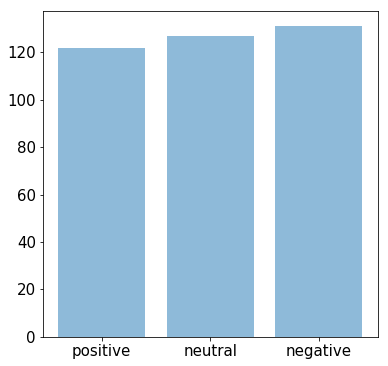

In [102]:
plot_Sentiment(summary_att)


h:


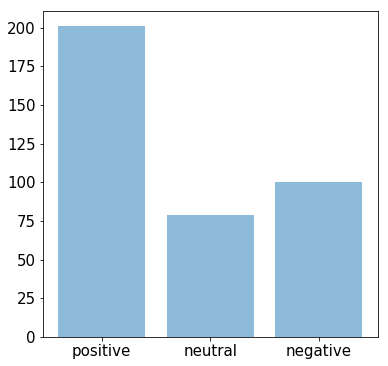

In [103]:
plot_Sentiment(summary_Tmobile)


In [104]:
def cleanup_data(sentences):
    clean_sentences = []
    for sentence in sentences:
        sentence=re.sub(r"http.?://[^\s]+[\s]?","",sentence)
        sentence=re.sub(r"@[^\s]+[\s]?","",sentence)
        sentence=re.sub(r"\s?[0-9]+\.?[0-9]*","",sentence)
        sentence=re.sub(r"[^a-zA-Z0-9 ]","",sentence)
        clean_sentences.append(sentence)

    return clean_sentences


In [105]:
clean_sentences_att=cleanup_data(sentences_att)
for item in range (0,6):
        print(clean_sentences_att[item])
        print("-----------------------------------------------------------------")
        print(sentences_att[item])
        print("******************************************************************")

I like how you advertise shows it was him as being on demand then it actually isnt Compared to spectrum you have AWFUL on demand options overpriced
-----------------------------------------------------------------
I like how you advertise shows (it was him) as being on demand then it actually isn't. Compared to spectrum you have AWFUL on demand options, overpriced.
******************************************************************
Please like if youve ever been given the run around by ATT and their insurance Asurion Ive wasted almost hours today between the two of them telling me that they couldnt do anything but the other one could
-----------------------------------------------------------------
Please like if you've ever been given the run around by AT&T and their "insurance" Asurion! I've wasted almost 3 hours today between the two of them telling me that they couldn't do anything, but the other one could.
******************************************************************
ATT  Fron

In [106]:
clean_sentences_Tmobile=cleanup_data(sentences_Tmobile)
for item in range (0,6):
        print(clean_sentences_Tmobile[item])
        print("-----------------------------------------------------------------")
        print(sentences_Tmobile[item])
        print("******************************************************************")

TMobile Tuesdays is the worst app Every week it wants me to update then it wont update and now its not accessible from play store or the internet What the heck
-----------------------------------------------------------------
T-Mobile Tuesdays is the worst app. Every week it wants me to update then it won't update and now it's not accessible from play store or the internet. What the heck.
******************************************************************
MilitaryVet Friends ANDOR Those with RECENT  Year ago or less TMobile User Experience  With TMobiles new mllilitary deal PLUS the SprintTMobile merger  Im considering switching from Sprint  Thoughts  Im out of contract My phone is paid off See More
-----------------------------------------------------------------
Military/Vet Friends AND/OR Those with RECENT (1 Year ago or less) T-Mobile User Experience - With T-Mobile's new mllilitary deal PLUS the Sprint/T-Mobile merger,  I'm considering switching from Sprint.  Thoughts?  1. I'm out 

In [107]:
def  tokenize_data(cleaned_sentence,label):
    stop_words = stopwords.words('english')
    porter_stemmer = PorterStemmer()
    cleaned_sentence_tokens=[]
    tokens_temp=[]
    for sentence in cleaned_sentence:
        cleaned_sentence_tokens.append([token.strip() for token in nltk.word_tokenize(sentence.lower()) 
                if token.strip() not in stop_words])
    #print(cleaned_sentence_tokens)
    for tokens in cleaned_sentence_tokens:
        for token in tokens:
            tokens_temp.append(porter_stemmer.stem(token))
            evaluation= ' '.join(tokens_temp)
            token_count={token:tokens_temp.count(token) for token in set(tokens_temp)}
        print(token_count)

    


In [108]:
tokenize_data(clean_sentences_att,label_att)

{'spectrum': 1, 'option': 1, 'advertis': 1, 'like': 1, 'isnt': 1, 'overpr': 1, 'actual': 1, 'demand': 2, 'show': 1, 'compar': 1, 'aw': 1}
{'youv': 1, 'two': 1, 'couldnt': 1, 'advertis': 1, 'tell': 1, 'insur': 1, 'given': 1, 'anyth': 1, 'option': 1, 'one': 1, 'today': 1, 'could': 1, 'asurion': 1, 'ever': 1, 'overpr': 1, 'isnt': 1, 'show': 1, 'aw': 1, 'spectrum': 1, 'almost': 1, 'actual': 1, 'wast': 1, 'demand': 2, 'pleas': 1, 'att': 1, 'run': 1, 'ive': 1, 'like': 2, 'hour': 1, 'compar': 1, 'around': 1}
{'youv': 1, 'two': 1, 'couldnt': 1, 'advertis': 1, 'tell': 1, 'commun': 1, 'insur': 1, 'given': 1, 'anyth': 1, 'option': 1, 'frontier': 1, 'one': 2, 'today': 1, 'could': 1, 'asurion': 1, 'ever': 1, 'overpr': 1, 'isnt': 1, 'show': 1, 'aw': 1, 'need': 1, 'spectrum': 1, 'almost': 1, 'dont': 1, 'actual': 1, 'wast': 1, 'demand': 2, 'pleas': 1, 'worst': 1, 'discount': 1, 'att': 2, 'run': 1, 'look': 1, 'someth': 1, 'ive': 1, 'like': 2, 'yall': 1, 'month': 1, 'hour': 1, 'compar': 1, 'around': 1}


{'new': 3, 'cant': 3, 'owe': 1, 'take': 3, 'ugh': 1, 'know': 2, 'morn': 2, 'smart': 1, 'advertis': 1, 'want': 1, 'tell': 3, 'intl': 1, 'less': 1, 'pick': 1, 'box': 1, 'last': 3, 'attdirectv': 1, 'area': 1, 'bounc': 1, 'access': 1, 'follow': 1, 'anyon': 1, 'ray': 1, 'coincident': 1, 'metro': 1, 'continu': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'drive': 1, 'need': 1, 'unabl': 1, 'kind': 1, 'spectrum': 1, 'earli': 1, 'right': 3, 'thru': 1, 'bill': 2, 'allow': 1, 'data': 1, 'tv': 1, 'ask': 1, 'pleas': 2, 'march': 2, 'gave': 2, 'murfreesboro': 1, 'saga': 1, 'end': 1, 'run': 1, 'account': 1, 'handl': 1, 'point': 1, 'cell': 2, 'even': 1, 'kindli': 1, 'everyon': 1, 'comput': 1, 'year': 1, 'yan': 1, 'phone': 7, 'hour': 5, 'go': 1, 'staff': 1, 'wait': 1, 'seem': 1, 'program': 1, 'great': 1, 'address': 3, 'youv': 1, 'must': 1, 'two': 5, 'line': 1, 'alreadi': 1, 'compani': 2, 'smiley': 1, 'overzeal': 1, 'dump': 1, 'long': 1, 'numer': 1, 'ms': 1, 'oper': 1, 'watch': 1, 'verizon': 1, 'aryann': 1,

{'take': 3, 'morn': 2, 'smart': 1, 'want': 1, 'respons': 1, 'pick': 2, 'box': 1, 'last': 4, 'control': 1, 'coincident': 1, 'someon': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'drive': 1, 'fb': 1, 'kind': 2, 'spectrum': 1, 'right': 3, 'allow': 1, 'data': 1, 'ask': 2, 'sent': 1, 'pleas': 3, 'murfreesboro': 1, 'end': 1, 'handl': 1, 'everyon': 1, 'answer': 3, 'specialist': 1, 'go': 1, 'line': 1, 'overzeal': 1, 'use': 1, 'verizon': 1, 'commun': 1, 'center': 1, 'site': 1, 'error': 1, 'superstiti': 1, 'anoth': 3, 'experi': 1, 'clock': 1, 'process': 1, 'cycl': 1, 'understand': 2, 'nice': 2, 'month': 5, 'restor': 1, 'mention': 1, 'loyalti': 2, 'ho': 1, 'put': 2, 'three': 1, 'fact': 1, 'see': 3, 'given': 2, 'ever': 1, 'silver': 1, 'rep': 1, 'almost': 3, 'voic': 2, 'us': 9, 'hello': 3, 'phew': 1, 'pass': 1, 'look': 1, 'spenthour': 1, 'question': 2, 'signal': 1, 'tomlin': 1, 'shortli': 1, 'would': 2, 'ok': 2, 'deja': 1, 'noth': 1, 'sold': 1, 'told': 1, 'comput': 2, 'retroact': 2, 'call': 11, 'joke

{'take': 3, 'morn': 2, 'smart': 1, 'want': 1, 'respons': 1, 'pick': 2, 'box': 1, 'last': 4, 'control': 1, 'coincident': 1, 'someon': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'drive': 1, 'fb': 1, 'kind': 2, 'spectrum': 1, 'right': 3, 'threaten': 2, 'allow': 1, 'data': 1, 'ask': 2, 'sent': 1, 'pleas': 3, 'murfreesboro': 1, 'end': 3, 'longer': 1, 'handl': 1, 'everyon': 1, 'answer': 4, 'specialist': 1, 'go': 1, 'line': 1, 'overzeal': 1, 'use': 1, 'verizon': 1, 'receiv': 1, 'commun': 1, 'center': 1, 'site': 1, 'error': 1, 'period': 1, 'superstiti': 1, 'anoth': 3, 'experi': 1, 'clock': 1, 'process': 1, 'cycl': 1, 'balanc': 1, 'understand': 2, 'nice': 2, 'month': 5, 'restor': 2, 'mention': 1, 'loyalti': 2, 'ho': 1, 'put': 2, 'three': 5, 'fact': 2, 'see': 3, 'given': 3, 'ever': 1, 'silver': 1, 'rep': 3, 'almost': 3, 'voic': 2, 'us': 9, 'hello': 3, 'phew': 1, 'pass': 1, 'look': 1, 'spenthour': 1, 'question': 2, 'signal': 1, 'tomlin': 1, 'client': 1, 'shortli': 1, 'would': 3, 'ok': 

{'take': 3, 'morn': 2, 'smart': 1, 'want': 1, 'respons': 1, 'pick': 2, 'box': 1, 'last': 5, 'happen': 1, 'control': 1, 'coincident': 1, 'someon': 3, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'drive': 2, 'fb': 1, 'kind': 2, 'spectrum': 1, 'right': 3, 'threaten': 2, 'allow': 1, 'data': 1, 'sponsor': 1, 'ask': 3, 'sent': 1, 'pleas': 4, 'murfreesboro': 1, 'end': 3, 'longer': 1, 'handl': 1, 'group': 1, 'everyon': 1, 'answer': 4, 'specialist': 1, 'go': 1, 'final': 1, 'line': 1, 'overzeal': 1, 'use': 1, 'verizon': 1, 'receiv': 1, 'commun': 3, 'center': 1, 'site': 1, 'error': 2, 'period': 1, 'superstiti': 1, 'anoth': 4, 'experi': 1, 'clock': 1, 'process': 1, 'cycl': 1, 'balanc': 1, 'understand': 3, 'nice': 2, 'month': 5, 'way': 1, 'restor': 2, 'mention': 1, 'loyalti': 2, 'ho': 1, 'put': 2, 'three': 5, 'fact': 2, 'see': 3, 'suppos': 1, 'given': 3, 'ever': 1, 'late': 1, 'silver': 2, 'rep': 3, 'almost': 3, 'voic': 2, 'us': 9, 'hello': 3, 'phew': 1, 'pass': 1, 'assum': 1, 'look': 1, 'spen

{'take': 3, 'morn': 2, 'smart': 1, 'want': 1, 'respons': 1, 'pick': 2, 'box': 1, 'last': 5, 'happen': 1, 'control': 1, 'coincident': 1, 'someon': 3, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'outkast': 1, 'drive': 2, 'fb': 1, 'kind': 2, 'spectrum': 1, 'right': 3, 'threaten': 2, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 1, 'ask': 3, 'sent': 1, 'pleas': 4, 'murfreesboro': 1, 'end': 3, 'longer': 1, 'handl': 1, 'group': 1, 'white': 1, 'everyon': 1, 'answer': 4, 'specialist': 1, 'go': 3, 'light': 1, 'final': 1, 'line': 1, 'overzeal': 1, 'use': 1, 'verizon': 1, 'receiv': 1, 'commun': 3, 'center': 2, 'site': 1, 'error': 2, 'period': 1, 'superstiti': 1, 'anoth': 4, 'experi': 1, 'clock': 1, 'support': 1, 'process': 1, 'cycl': 1, 'balanc': 1, 'understand': 3, 'nice': 2, 'month': 5, 'way': 1, 'restor': 2, 'mention': 1, 'loyalti': 2, 'ho': 1, 'put': 2, 'microsoft': 1, 'three': 5, 'ibm': 1, 'po': 1, 'fact': 2, 'see': 3, 'suppos': 1, 'given': 3, 'denver': 3, 'ever': 1, 'late': 1, 'silve

{'take': 3, 'morn': 2, 'smart': 1, 'want': 1, 'respons': 1, 'pick': 2, 'box': 1, 'last': 5, 'happen': 1, 'control': 1, 'coincident': 1, 'someon': 3, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'outkast': 1, 'drive': 2, 'fb': 1, 'kind': 2, 'spectrum': 1, 'right': 3, 'threaten': 2, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 1, 'ask': 3, 'sent': 2, 'pleas': 4, 'murfreesboro': 1, 'end': 3, 'longer': 2, 'handl': 1, 'group': 1, 'white': 1, 'everyon': 1, 'answer': 4, 'specialist': 1, 'go': 3, 'light': 1, 'final': 1, 'line': 1, 'overzeal': 1, 'directvnow': 1, 'use': 1, 'verizon': 1, 'receiv': 1, 'commun': 3, 'center': 2, 'site': 1, 'error': 2, 'period': 1, 'superstiti': 1, 'anoth': 4, 'experi': 1, 'clock': 1, 'support': 1, 'process': 1, 'cycl': 1, 'balanc': 1, 'understand': 3, 'nice': 2, 'month': 5, 'way': 1, 'restor': 2, 'mention': 1, 'loyalti': 2, 'ho': 1, 'put': 2, 'microsoft': 1, 'three': 5, 'ibm': 1, 'po': 1, 'fact': 2, 'see': 3, 'suppos': 1, 'given': 3, 'denver': 3, 'ever': 1, 

{'take': 3, 'morn': 2, 'smart': 1, 'want': 1, 'respons': 1, 'pick': 2, 'box': 1, 'last': 5, 'happen': 1, 'control': 1, 'coincident': 1, 'someon': 3, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'outkast': 1, 'drive': 2, 'fb': 1, 'prioriti': 1, 'kind': 2, 'spectrum': 1, 'right': 3, 'threaten': 2, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 1, 'ask': 3, 'sent': 2, 'pleas': 4, 'murfreesboro': 1, 'end': 3, 'longer': 2, 'handl': 1, 'group': 1, 'white': 1, 'everyon': 1, 'answer': 5, 'specialist': 1, 'order': 1, 'go': 4, 'light': 1, 'elliman': 1, 'final': 1, 'line': 1, 'overzeal': 1, 'directvnow': 1, 'use': 1, 'tajmel': 1, 'verizon': 1, 'receiv': 1, 'commun': 4, 'inconsist': 1, 'center': 2, 'site': 1, 'real': 1, 'error': 2, 'period': 1, 'superstiti': 1, 'anoth': 4, 'experi': 2, 'word': 1, 'clock': 1, 'support': 1, 'process': 1, 'feder': 1, 'remedi': 1, 'cycl': 1, 'balanc': 1, 'understand': 3, 'nice': 2, 'month': 5, 'way': 1, 'restor': 2, 'mention': 1, 'loyalti': 2, 'ho': 1,

{'take': 4, 'morn': 2, 'smart': 1, 'want': 2, 'respons': 1, 'pick': 3, 'box': 1, 'last': 5, 'happen': 2, 'control': 1, 'coincident': 1, 'someon': 3, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'outkast': 1, 'drive': 2, 'fb': 1, 'prioriti': 1, 'kind': 2, 'spectrum': 1, 'right': 4, 'threaten': 2, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 1, 'ask': 4, 'sent': 2, 'pleas': 4, 'treat': 1, 'murfreesboro': 1, 'end': 3, 'longer': 2, 'handl': 1, 'group': 1, 'white': 1, 'everyon': 1, 'answer': 5, 'specialist': 1, 'order': 1, 'go': 7, 'variou': 1, 'light': 1, 'elliman': 1, 'final': 1, 'line': 1, 'overzeal': 1, 'directvnow': 1, 'use': 1, 'recommend': 1, 'tajmel': 1, 'verizon': 1, 'receiv': 1, 'commun': 5, 'inconsist': 1, 'center': 2, 'site': 1, 'real': 1, 'bit': 1, 'error': 2, 'period': 1, 'superstiti': 1, 'anoth': 4, 'experi': 2, 'word': 1, 'clock': 1, 'support': 1, 'process': 1, 'feder': 1, 'remedi': 1, 'cycl': 1, 'balanc': 1, 'understand': 3, 'nice': 4, 'month': 5, 'way': 1

{'take': 4, 'morn': 2, 'smart': 1, 'want': 2, 'respons': 1, 'pick': 3, 'box': 1, 'last': 5, 'happen': 2, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 3, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'outkast': 1, 'drive': 2, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'right': 4, 'threaten': 2, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 1, 'ask': 4, 'sent': 2, 'pleas': 4, 'treat': 1, 'murfreesboro': 1, 'end': 3, 'longer': 2, 'handl': 1, 'group': 1, 'white': 1, 'everyon': 1, 'answer': 5, 'specialist': 1, 'colina': 1, 'order': 1, 'go': 7, 'variou': 1, 'light': 1, 'elliman': 1, 'hewlett': 1, 'final': 1, 'line': 1, 'wellrun': 1, 'overzeal': 1, 'directvnow': 1, 'floor': 1, 'use': 1, 'recommend': 1, 'enterpris': 1, 'tajmel': 1, 'verizon': 2, 'receiv': 1, 'commun': 5, 'inconsist': 1, 'center': 2, 'site': 1, 'real': 1, 'bit': 1, 'error': 2, 'period': 1, 'superstiti': 1, 'anoth': 4, 'experi': 2, 'word': 1, 'clock': 1, 'support': 2, 'process

{'take': 4, 'morn': 2, 'smart': 1, 'want': 2, 'respons': 1, 'pick': 3, 'box': 1, 'last': 5, 'happen': 2, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 3, 'palett': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'outkast': 1, 'drive': 2, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'right': 4, 'threaten': 2, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 1, 'ask': 4, 'sent': 2, 'pleas': 4, 'treat': 1, 'murfreesboro': 1, 'end': 3, 'longer': 2, 'handl': 1, 'group': 1, 'white': 1, 'everyon': 1, 'answer': 5, 'specialist': 1, 'colina': 1, 'order': 1, 'go': 7, 'variou': 1, 'light': 1, 'elliman': 1, 'hewlett': 1, 'final': 1, 'line': 1, 'wellrun': 1, 'overzeal': 1, 'directvnow': 1, 'floor': 1, 'use': 1, 'recommend': 1, 'enterpris': 1, 'tajmel': 1, 'verizon': 2, 'receiv': 1, 'commun': 5, 'inconsist': 1, 'center': 2, 'site': 1, 'real': 1, 'bit': 1, 'error': 2, 'period': 1, 'superstiti': 1, 'explor': 1, 'anoth': 4, 'experi': 4, 'word': 1, 'clock':

{'take': 4, 'morn': 2, 'smart': 1, 'want': 3, 'respons': 1, 'pick': 3, 'box': 1, 'last': 5, 'happen': 2, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 3, 'palett': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'outkast': 1, 'drive': 2, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'right': 4, 'threaten': 2, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 1, 'ask': 4, 'sent': 2, 'pleas': 4, 'treat': 1, 'murfreesboro': 1, 'end': 3, 'longer': 2, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'everyon': 1, 'answer': 5, 'specialist': 1, 'colina': 1, 'order': 1, 'go': 9, 'variou': 1, 'light': 1, 'elliman': 1, 'hewlett': 1, 'final': 1, 'line': 1, 'wellrun': 1, 'overzeal': 1, 'directvnow': 1, 'floor': 1, 'use': 1, 'recommend': 1, 'enterpris': 1, 'circl': 1, 'tajmel': 1, 'verizon': 2, 'receiv': 1, 'commun': 5, 'inconsist': 1, 'center': 2, 'site': 1, 'real': 1, 'bit': 1, 'error': 2, 'period': 1, 'superstiti': 1, 'explor': 1, 'anoth': 4, 'experi':

{'take': 4, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 1, 'pick': 3, 'box': 3, 'last': 5, 'happen': 2, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 5, 'palett': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'outkast': 1, 'drive': 2, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'right': 4, 'threaten': 2, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 1, 'ask': 4, 'sent': 2, 'pleas': 4, 'treat': 1, 'murfreesboro': 1, 'end': 3, 'longer': 2, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'everyon': 1, 'answer': 5, 'specialist': 1, 'colina': 1, 'order': 1, 'go': 9, 'variou': 1, 'light': 1, 'elliman': 1, 'hewlett': 1, 'final': 1, 'line': 1, 'wellrun': 1, 'overzeal': 1, 'directvnow': 1, 'floor': 1, 'use': 1, 'recommend': 1, 'enterpris': 1, 'circl': 1, 'tajmel': 1, 'verizon': 2, 'receiv': 1, 'commun': 5, 'inconsist': 1, 'flag': 1, 'center': 2, 'site': 1, 'real': 1, 'bit': 1, 'error': 2, 'period': 1, 'superstiti': 1, 'explor': 1, 'anoth': 4

{'take': 5, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 1, 'pick': 3, 'box': 3, 'last': 5, 'sorri': 1, 'happen': 2, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 5, 'palett': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'outkast': 1, 'drive': 2, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'right': 4, 'threaten': 2, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 1, 'ask': 6, 'sent': 2, 'pleas': 4, 'treat': 1, 'murfreesboro': 1, 'end': 3, 'longer': 2, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'everyon': 1, 'answer': 5, 'specialist': 1, 'colina': 1, 'left': 1, 'order': 1, 'go': 10, 'variou': 1, 'light': 1, 'elliman': 1, 'hewlett': 1, 'final': 1, 'line': 1, 'wellrun': 1, 'overzeal': 1, 'directvnow': 1, 'floor': 1, 'use': 1, 'recommend': 1, 'enterpris': 1, 'circl': 1, 'tajmel': 1, 'verizon': 2, 'receiv': 1, 'commun': 5, 'inconsist': 1, 'flag': 1, 'center': 2, 'site': 1, 'real': 1, 'bit': 1, 'error': 2, 'period': 1, 'superstiti': 1,

{'take': 5, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 1, 'pick': 3, 'box': 3, 'last': 5, 'sorri': 1, 'happen': 2, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 5, 'palett': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'outkast': 1, 'drive': 2, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'right': 4, 'threaten': 2, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 1, 'ask': 6, 'sent': 2, 'pleas': 4, 'treat': 1, 'murfreesboro': 1, 'end': 3, 'longer': 2, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'everyon': 1, 'answer': 5, 'specialist': 1, 'colina': 1, 'left': 1, 'order': 1, 'go': 10, 'variou': 1, 'light': 1, 'elliman': 1, 'hewlett': 1, 'final': 1, 'line': 1, 'wellrun': 1, 'overzeal': 1, 'directvnow': 1, 'floor': 1, 'use': 1, 'recommend': 1, 'enterpris': 1, 'circl': 1, 'tajmel': 1, 'verizon': 2, 'receiv': 1, 'commun': 5, 'inconsist': 1, 'flag': 1, 'center': 2, 'site': 1, 'real': 1, 'bit': 1, 'error': 2, 'period': 1, 'superstiti': 1,

{'take': 5, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 1, 'pick': 3, 'box': 3, 'last': 5, 'sorri': 1, 'happen': 2, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 5, 'palett': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'outkast': 1, 'drive': 2, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'right': 4, 'threaten': 2, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 1, 'ask': 6, 'sent': 2, 'pleas': 4, 'treat': 1, 'murfreesboro': 1, 'end': 3, 'longer': 2, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'everyon': 1, 'answer': 5, 'specialist': 1, 'colina': 1, 'left': 1, 'order': 1, 'go': 10, 'variou': 1, 'light': 1, 'elliman': 1, 'hewlett': 1, 'final': 1, 'line': 1, 'wellrun': 1, 'overzeal': 1, 'directvnow': 1, 'floor': 1, 'use': 1, 'recommend': 1, 'enterpris': 1, 'circl': 1, 'tajmel': 1, 'verizon': 2, 'receiv': 1, 'commun': 5, 'inconsist': 1, 'flag': 1, 'center': 2, 'site': 1, 'real': 1, 'bit': 1, 'error': 2, 'period': 1, 'superstiti': 1,

{'take': 5, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 2, 'pick': 3, 'box': 3, 'last': 5, 'sorri': 1, 'happen': 2, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 5, 'palett': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'outkast': 1, 'drive': 2, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'right': 4, 'threaten': 2, 'horribl': 1, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 1, 'ask': 6, 'sent': 2, 'pleas': 4, 'treat': 1, 'murfreesboro': 1, 'end': 3, 'longer': 2, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'everyon': 1, 'answer': 5, 'specialist': 1, 'colina': 1, 'left': 1, 'order': 1, 'go': 10, 'variou': 1, 'light': 1, 'elliman': 1, 'hewlett': 1, 'final': 1, 'line': 1, 'wellrun': 1, 'overzeal': 1, 'directvnow': 1, 'floor': 1, 'use': 1, 'recommend': 1, 'enterpris': 1, 'circl': 1, 'tajmel': 1, 'verizon': 2, 'receiv': 1, 'commun': 5, 'agreement': 1, 'inconsist': 1, 'flag': 1, 'center': 2, 'goe': 1, 'site': 1, 'real': 1, 'bit': 1, '

{'take': 5, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 2, 'pick': 3, 'box': 3, 'last': 5, 'sorri': 1, 'happen': 2, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 5, 'palett': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'outkast': 1, 'drive': 2, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'right': 4, 'threaten': 2, 'horribl': 1, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 1, 'ask': 6, 'sent': 2, 'pleas': 4, 'treat': 1, 'murfreesboro': 1, 'end': 3, 'longer': 2, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'everyon': 1, 'answer': 5, 'specialist': 1, 'colina': 1, 'left': 1, 'order': 1, 'go': 10, 'variou': 1, 'light': 1, 'elliman': 1, 'hewlett': 1, 'final': 1, 'line': 1, 'wellrun': 1, 'america': 1, 'overzeal': 1, 'directvnow': 1, 'floor': 1, 'use': 1, 'recommend': 1, 'enterpris': 1, 'circl': 1, 'tajmel': 1, 'verizon': 2, 'receiv': 1, 'commun': 5, 'agreement': 1, 'inconsist': 1, 'flag': 1, 'center': 2, 'goe': 1, 'site': 1, 'real': 

{'take': 5, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 2, 'pick': 3, 'box': 3, 'last': 5, 'sorri': 1, 'happen': 3, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 5, 'palett': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'outkast': 1, 'drive': 2, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'right': 4, 'threaten': 2, 'horribl': 1, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 1, 'ask': 6, 'sent': 2, 'pleas': 4, 'treat': 1, 'murfreesboro': 1, 'end': 3, 'longer': 2, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'everyon': 1, 'answer': 6, 'specialist': 1, 'colina': 1, 'left': 1, 'order': 1, 'go': 10, 'variou': 1, 'light': 1, 'elliman': 1, 'hewlett': 1, 'final': 1, 'line': 1, 'wellrun': 1, 'america': 1, 'anybodi': 1, 'overzeal': 1, 'directvnow': 1, 'floor': 1, 'use': 1, 'recommend': 1, 'enterpris': 1, 'circl': 1, 'tajmel': 1, 'verizon': 2, 'receiv': 2, 'commun': 5, 'agreement': 1, 'inconsist': 1, 'flag': 1, 'center': 2, 'goe': 1, 'site

{'take': 5, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 2, 'pick': 3, 'box': 3, 'last': 5, 'sorri': 1, 'happen': 3, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 5, 'palett': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'outkast': 1, 'drive': 2, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'right': 4, 'threaten': 2, 'horribl': 1, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 1, 'ask': 6, 'sent': 2, 'pleas': 4, 'treat': 1, 'murfreesboro': 1, 'end': 3, 'longer': 2, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'everyon': 1, 'answer': 6, 'specialist': 1, 'colina': 1, 'left': 1, 'order': 1, 'go': 10, 'variou': 1, 'light': 1, 'elliman': 1, 'hewlett': 1, 'final': 1, 'line': 1, 'wellrun': 1, 'america': 1, 'anybodi': 1, 'overzeal': 1, 'directvnow': 1, 'floor': 1, 'use': 1, 'recommend': 1, 'enterpris': 1, 'circl': 1, 'tajmel': 1, 'verizon': 2, 'receiv': 2, 'commun': 5, 'agreement': 1, 'inconsist': 1, 'flag': 1, 'center': 2, 'goe': 1, 'site

{'take': 5, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 2, 'pick': 3, 'box': 3, 'last': 5, 'sorri': 1, 'happen': 3, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 5, 'palett': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'outkast': 1, 'drive': 2, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'right': 4, 'threaten': 2, 'horribl': 1, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 1, 'ask': 6, 'sent': 2, 'pleas': 4, 'treat': 1, 'murfreesboro': 1, 'end': 3, 'longer': 2, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'everyon': 1, 'answer': 6, 'specialist': 1, 'colina': 1, 'left': 1, 'order': 1, 'go': 10, 'variou': 1, 'light': 1, 'elliman': 1, 'hewlett': 1, 'final': 1, 'line': 1, 'wellrun': 1, 'america': 1, 'anybodi': 1, 'overzeal': 1, 'directvnow': 1, 'floor': 1, 'use': 1, 'recommend': 1, 'enterpris': 1, 'circl': 1, 'tajmel': 1, 'verizon': 2, 'receiv': 2, 'commun': 5, 'agreement': 1, 'inconsist': 1, 'flag': 1, 'center': 2, 'goe': 1, 'site

{'take': 5, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 2, 'pick': 3, 'box': 3, 'last': 5, 'sorri': 1, 'happen': 3, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 5, 'palett': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'outkast': 1, 'drive': 2, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'right': 4, 'threaten': 2, 'horribl': 1, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 1, 'ask': 6, 'sent': 2, 'pleas': 4, 'treat': 1, 'murfreesboro': 1, 'end': 3, 'longer': 2, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 1, 'answer': 6, 'specialist': 1, 'colina': 1, 'left': 1, 'order': 1, 'go': 10, 'variou': 1, 'light': 1, 'elliman': 1, 'hewlett': 1, 'final': 1, 'line': 1, 'wellrun': 1, 'america': 1, 'anybodi': 1, 'overzeal': 1, 'directvnow': 1, 'floor': 1, 'use': 1, 'recommend': 1, 'enterpris': 1, 'circl': 1, 'tajmel': 1, 'verizon': 2, 'receiv': 2, 'commun': 5, 'agreement': 1, 'inconsist': 1, 'flag': 1, 'center': 2, 'go

{'take': 5, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 2, 'pick': 3, 'box': 3, 'last': 5, 'sorri': 1, 'happen': 3, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 5, 'palett': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'outkast': 1, 'drive': 2, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 4, 'threaten': 2, 'horribl': 1, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 1, 'ask': 6, 'sent': 2, 'pleas': 4, 'treat': 1, 'murfreesboro': 1, 'end': 3, 'longer': 2, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 1, 'answer': 6, 'specialist': 1, 'colina': 1, 'left': 1, 'order': 1, 'go': 12, 'variou': 1, 'light': 1, 'elliman': 1, 'hewlett': 1, 'final': 1, 'line': 2, 'wellrun': 1, 'america': 1, 'anybodi': 1, 'overzeal': 1, 'directvnow': 1, 'floor': 1, 'use': 1, 'recommend': 1, 'enterpris': 1, 'circl': 1, 'tajmel': 1, 'verizon': 2, 'receiv': 2, 'commun': 5, 'agreement': 1, 'inconsist': 1, 'flag': 1, 'c

{'take': 5, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 3, 'pick': 3, 'box': 3, 'last': 5, 'sorri': 1, 'happen': 3, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 5, 'palett': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'outkast': 1, 'drive': 2, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 4, 'threaten': 2, 'horribl': 1, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 1, 'ask': 6, 'sent': 2, 'pleas': 4, 'treat': 1, 'murfreesboro': 1, 'end': 3, 'longer': 2, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 1, 'answer': 6, 'specialist': 1, 'colina': 1, 'left': 1, 'order': 1, 'go': 12, 'variou': 1, 'light': 1, 'elliman': 1, 'hewlett': 1, 'final': 1, 'line': 2, 'wellrun': 1, 'america': 1, 'anybodi': 1, 'overzeal': 1, 'directvnow': 1, 'floor': 1, 'use': 1, 'recommend': 1, 'enterpris': 1, 'circl': 1, 'tajmel': 1, 'verizon': 2, 'receiv': 2, 'commun': 5, 'agreement': 1, 'bs': 1, 'inconsist': 1, 'fla

{'take': 5, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 3, 'pick': 3, 'box': 3, 'last': 5, 'sorri': 1, 'happen': 3, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 5, 'palett': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'outkast': 1, 'drive': 2, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 4, 'threaten': 2, 'horribl': 1, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 1, 'ask': 6, 'sent': 2, 'pleas': 4, 'treat': 1, 'murfreesboro': 1, 'end': 3, 'longer': 2, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 1, 'answer': 6, 'specialist': 1, 'colina': 1, 'left': 1, 'order': 1, 'go': 12, 'variou': 1, 'light': 1, 'elliman': 1, 'hewlett': 1, 'final': 2, 'line': 2, 'wellrun': 1, 'america': 1, 'anybodi': 1, 'overzeal': 1, 'directvnow': 1, 'floor': 1, 'use': 1, 'recommend': 1, 'enterpris': 1, 'circl': 1, 'tajmel': 1, 'verizon': 2, 'receiv': 2, 'commun': 5, 'agreement': 1, 'bs': 1, 'inconsi

{'take': 5, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 3, 'pick': 3, 'box': 3, 'last': 5, 'sorri': 1, 'happen': 3, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 5, 'palett': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'outkast': 1, 'drive': 2, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 4, 'threaten': 2, 'horribl': 1, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 1, 'ask': 6, 'competit': 2, 'sent': 2, 'pleas': 4, 'treat': 1, 'murfreesboro': 1, 'end': 3, 'longer': 2, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 1, 'answer': 6, 'specialist': 1, 'colina': 1, 'left': 1, 'order': 1, 'go': 12, 'variou': 1, 'light': 1, 'elliman': 1, 'hewlett': 1, 'final': 2, 'line': 2, 'wellrun': 1, 'america': 1, 'anybodi': 1, 'overzeal': 1, 'directvnow': 1, 'floor': 1, 'use': 1, 'recommend': 1, 'enterpris': 1, 'circl': 1, 'tajmel': 1, 'verizon': 2, 'receiv': 2, 'commun': 6, 'skill': 1, 'agree

{'take': 5, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 3, 'pick': 3, 'box': 3, 'last': 5, 'sorri': 1, 'happen': 3, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 5, 'palett': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'outkast': 1, 'drive': 2, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 4, 'threaten': 2, 'horribl': 1, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 1, 'ask': 6, 'competit': 4, 'sent': 2, 'pleas': 4, 'treat': 1, 'murfreesboro': 1, 'end': 3, 'longer': 2, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 1, 'answer': 6, 'specialist': 1, 'colina': 1, 'left': 1, 'order': 1, 'griffiss': 1, 'go': 12, 'variou': 1, 'light': 1, 'elliman': 1, 'hewlett': 1, 'final': 2, 'line': 2, 'wellrun': 1, 'america': 1, 'anybodi': 1, 'overzeal': 1, 'directvnow': 1, 'floor': 1, 'use': 1, 'recommend': 1, 'enterpris': 1, 'circl': 1, 'tajmel': 1, 'verizon': 2, 'receiv': 2, 'commun': 6, 'sk

{'take': 5, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 3, 'pick': 3, 'box': 3, 'last': 5, 'sorri': 1, 'happen': 3, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 5, 'palett': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'outkast': 1, 'drive': 2, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 4, 'threaten': 2, 'horribl': 1, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 1, 'ask': 8, 'competit': 4, 'sent': 2, 'pleas': 4, 'treat': 2, 'murfreesboro': 1, 'end': 3, 'longer': 2, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 1, 'answer': 6, 'specialist': 1, 'colina': 1, 'left': 1, 'order': 1, 'griffiss': 1, 'go': 12, 'variou': 1, 'light': 1, 'elliman': 1, 'hewlett': 1, 'final': 2, 'line': 2, 'wellrun': 1, 'america': 1, 'anybodi': 1, 'overzeal': 1, 'directvnow': 1, 'floor': 1, 'use': 1, 'recommend': 1, 'enterpris': 1, 'circl': 1, 'tajmel': 1, 'verizon': 2, 'receiv': 2, 'commun': 6, 'sk

{'take': 5, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 3, 'pick': 3, 'box': 3, 'last': 5, 'sorri': 1, 'happen': 3, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 5, 'palett': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'drive': 2, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 4, 'threaten': 2, 'horribl': 1, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 1, 'ask': 8, 'competit': 4, 'sent': 2, 'pleas': 4, 'treat': 2, 'murfreesboro': 1, 'end': 3, 'longer': 2, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 1, 'answer': 6, 'specialist': 1, 'colina': 1, 'left': 1, 'order': 1, 'griffiss': 1, 'go': 12, 'variou': 1, 'light': 1, 'elliman': 1, 'hewlett': 1, 'final': 2, 'line': 2, 'wellrun': 1, 'america': 1, 'anybodi': 1, 'overzeal': 1, 'directvnow': 1, 'floor': 1, 'use': 5, 'recommend': 1, 'enterpris': 1, 'circl': 1, 'tajmel': 1, 'verizon': 2, 'receiv': 2, 'co

{'ipad': 1, 'take': 5, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 3, 'pick': 3, 'box': 3, 'last': 5, 'sorri': 1, 'happen': 3, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 5, 'palett': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 2, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 4, 'threaten': 2, 'horribl': 1, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 1, 'ask': 8, 'competit': 4, 'sent': 2, 'pleas': 4, 'treat': 3, 'murfreesboro': 1, 'end': 3, 'longer': 2, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 2, 'answer': 7, 'specialist': 1, 'colina': 1, 'left': 1, 'order': 1, 'griffiss': 1, 'go': 12, 'variou': 1, 'light': 1, 'elliman': 1, 'hewlett': 1, 'final': 2, 'line': 3, 'wellrun': 1, 'america': 1, 'anybodi': 1, 'overzeal': 1, 'directvnow': 1, 'floor': 1, 'use': 5, 'recommend': 1, 'enterpris': 1, 'circl': 1, 'tajmel': 1, 'veriz

{'ipad': 1, 'take': 5, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 3, 'pick': 3, 'box': 3, 'last': 5, 'sorri': 1, 'happen': 3, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 5, 'palett': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 2, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 4, 'threaten': 2, 'horribl': 1, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 1, 'ask': 8, 'competit': 4, 'sent': 2, 'pleas': 4, 'treat': 3, 'murfreesboro': 1, 'end': 3, 'longer': 2, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 2, 'answer': 7, 'specialist': 1, 'colina': 1, 'left': 1, 'order': 1, 'griffiss': 1, 'go': 12, 'variou': 1, 'light': 1, 'elliman': 1, 'hewlett': 1, 'final': 2, 'line': 3, 'wellrun': 1, 'america': 1, 'anybodi': 1, 'overzeal': 1, 'directvnow': 1, 'floor': 1, 'use': 5, 'recommend': 1, 'enterpris': 1, 'circl': 1, 'tajmel': 1, 'veriz

{'ipad': 1, 'take': 5, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 3, 'pick': 3, 'box': 3, 'last': 5, 'sorri': 1, 'happen': 3, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 5, 'palett': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 2, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 4, 'threaten': 2, 'horribl': 1, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 1, 'ask': 8, 'competit': 4, 'sent': 2, 'pleas': 4, 'treat': 3, 'murfreesboro': 1, 'end': 3, 'longer': 2, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 2, 'answer': 7, 'specialist': 1, 'colina': 1, 'left': 1, 'order': 1, 'griffiss': 1, 'go': 12, 'variou': 1, 'light': 1, 'elliman': 1, 'hewlett': 1, 'final': 2, 'line': 3, 'wellrun': 1, 'america': 1, 'anybodi': 1, 'overzeal': 1, 'directvnow': 1, 'floor': 1, 'use': 5, 'recommend': 1, 'enterpris': 1, 'circl': 1, 'tajmel': 1, 'veriz

{'ipad': 1, 'take': 5, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 3, 'pick': 3, 'box': 3, 'last': 5, 'sorri': 1, 'research': 1, 'happen': 3, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 5, 'palett': 1, 'itcanwait': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 5, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 4, 'threaten': 2, 'horribl': 1, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 1, 'ask': 8, 'competit': 4, 'sent': 2, 'pleas': 4, 'treat': 3, 'murfreesboro': 1, 'end': 3, 'longer': 2, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 2, 'answer': 7, 'specialist': 1, 'colina': 1, 'left': 1, 'order': 1, 'griffiss': 1, 'go': 12, 'variou': 1, 'light': 1, 'elliman': 1, 'hewlett': 1, 'final': 2, 'line': 3, 'wellrun': 1, 'america': 1, 'anybodi': 1, 'overzeal': 1, 'directvnow': 1, 'floor': 1, 'use': 6, 'recommend': 1, 'enterpris': 1, 

{'ipad': 1, 'take': 5, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 3, 'pick': 4, 'box': 3, 'last': 6, 'sorri': 1, 'research': 1, 'happen': 3, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 6, 'palett': 1, 'itcanwait': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 5, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 4, 'threaten': 2, 'horribl': 1, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 1, 'ask': 8, 'competit': 4, 'sent': 2, 'pleas': 4, 'treat': 3, 'murfreesboro': 1, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 2, 'answer': 7, 'specialist': 1, 'colina': 1, 'left': 1, 'order': 1, 'griffiss': 1, 'go': 13, 'variou': 1, 'light': 1, 'elliman': 1, 'hewlett': 1, 'final': 2, 'line': 3, 'wellrun': 1, 'america': 1, 'anybodi': 1, 'gen': 1, 'overzeal': 1, 'directvnow': 1, 'floor': 1, 'use': 6, 'recommen

{'ipad': 1, 'take': 5, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 3, 'pick': 4, 'box': 3, 'last': 6, 'sorri': 1, 'research': 1, 'happen': 4, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 6, 'palett': 1, 'itcanwait': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 5, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 4, 'threaten': 2, 'horribl': 1, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 1, 'ask': 8, 'competit': 4, 'sent': 2, 'pleas': 4, 'treat': 3, 'murfreesboro': 1, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 2, 'answer': 7, 'specialist': 1, 'colina': 1, 'left': 1, 'order': 1, 'griffiss': 1, 'go': 13, 'variou': 1, 'light': 1, 'elliman': 1, 'hewlett': 1, 'final': 2, 'line': 3, 'wellrun': 1, 'america': 1, 'anybodi': 1, 'gen': 1, 'overzeal': 1, 'directvnow': 1, 'floor': 1, 'use': 6, 'recommen

{'ipad': 1, 'take': 5, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 3, 'pick': 4, 'box': 3, 'last': 6, 'sorri': 1, 'research': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 6, 'palett': 1, 'itcanwait': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 5, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 4, 'threaten': 2, 'horribl': 1, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 1, 'ask': 8, 'competit': 4, 'sent': 2, 'pleas': 4, 'treat': 3, 'murfreesboro': 1, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 2, 'answer': 7, 'specialist': 1, 'colina': 1, 'left': 1, 'order': 1, 'griffiss': 1, 'go': 13, 'variou': 1, 'light': 1, 'elliman': 1, 'hewlett': 1, 'keith': 1, 'final': 2, 'line': 3, 'wellrun': 1, 'america': 1, 'anybodi': 1, 'gen': 1, 'overzeal': 1, 'directvnow': 1, 'floor'

{'ipad': 1, 'take': 5, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 3, 'pick': 4, 'box': 3, 'last': 6, 'sorri': 1, 'research': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 6, 'palett': 1, 'itcanwait': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 5, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 4, 'threaten': 2, 'horribl': 1, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 1, 'ask': 8, 'competit': 4, 'sent': 2, 'pleas': 4, 'treat': 3, 'murfreesboro': 1, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 2, 'answer': 7, 'specialist': 1, 'colina': 1, 'left': 1, 'order': 1, 'griffiss': 1, 'go': 15, 'variou': 1, 'light': 1, 'elliman': 1, 'hewlett': 1, 'keith': 1, 'final': 2, 'line': 3, 'wellrun': 1, 'america': 1, 'anybodi': 1, 'gen': 1, 'overzeal': 1, 'directvnow': 1, 'floor'

{'ipad': 1, 'take': 5, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 3, 'pick': 4, 'box': 3, 'last': 6, 'sorri': 1, 'research': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 6, 'palett': 1, 'itcanwait': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 5, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 4, 'threaten': 2, 'horribl': 1, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 1, 'ask': 8, 'competit': 4, 'sent': 2, 'pleas': 4, 'treat': 3, 'murfreesboro': 1, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 2, 'answer': 7, 'specialist': 1, 'colina': 1, 'left': 1, 'order': 1, 'griffiss': 1, 'go': 15, 'variou': 1, 'light': 1, 'elliman': 1, 'hewlett': 1, 'keith': 1, 'final': 2, 'line': 3, 'wellrun': 1, 'america': 1, 'anybodi': 1, 'gen': 1, 'overzeal': 1, 'directvnow': 1, 'floor'

{'ipad': 1, 'take': 5, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 3, 'pick': 4, 'box': 3, 'last': 6, 'sorri': 1, 'research': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 6, 'palett': 1, 'itcanwait': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 5, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 4, 'threaten': 2, 'horribl': 1, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 1, 'ask': 8, 'competit': 4, 'sent': 2, 'pleas': 4, 'treat': 3, 'murfreesboro': 1, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 2, 'answer': 7, 'specialist': 1, 'colina': 1, 'left': 1, 'order': 1, 'griffiss': 1, 'go': 15, 'variou': 1, 'light': 1, 'elliman': 1, 'hewlett': 1, 'keith': 1, 'final': 2, 'line': 3, 'wellrun': 1, 'america': 1, 'anybodi': 1, 'gen': 1, 'overzeal': 1, 'directvnow': 1, 'floor'

{'ipad': 1, 'take': 5, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 3, 'regist': 1, 'pick': 4, 'box': 3, 'last': 6, 'sorri': 1, 'research': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 6, 'palett': 1, 'itcanwait': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 5, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 4, 'threaten': 2, 'horribl': 1, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 2, 'ask': 8, 'competit': 4, 'sent': 2, 'pleas': 4, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 2, 'answer': 7, 'specialist': 1, 'colina': 1, 'left': 1, 'order': 1, 'griffiss': 1, 'go': 15, 'variou': 1, 'light': 1, 'elliman': 1, 'hewlett': 1, 'keith': 1, 'final': 2, 'line': 3, 'wellrun': 1, 'america': 1, 'anybodi': 1, 'gen': 1, 'overzeal':

{'ipad': 1, 'take': 6, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 3, 'regist': 1, 'pick': 4, 'box': 3, 'last': 6, 'sorri': 1, 'research': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 6, 'palett': 1, 'itcanwait': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 5, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 4, 'threaten': 2, 'horribl': 1, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 2, 'ask': 8, 'competit': 4, 'sent': 2, 'pleas': 4, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 2, 'answer': 7, 'specialist': 1, 'colina': 1, 'left': 1, 'order': 1, 'griffiss': 1, 'go': 16, 'variou': 1, 'light': 1, 'elliman': 1, 'hewlett': 1, 'keith': 1, 'final': 2, 'line': 7, 'wellrun': 1, 'america': 1, 'anybodi': 1, 'gen': 1, 'overzeal':

{'ipad': 1, 'take': 6, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 3, 'regist': 1, 'pick': 4, 'box': 3, 'last': 6, 'sorri': 1, 'research': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 6, 'palett': 1, 'itcanwait': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 5, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 5, 'threaten': 2, 'horribl': 1, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 2, 'ask': 9, 'competit': 4, 'sent': 2, 'pleas': 4, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 2, 'answer': 8, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 1, 'order': 1, 'griffiss': 1, 'go': 16, 'variou': 1, 'light': 1, 'elliman': 1, 'hewlett': 1, 'keith': 1, 'final': 2, 'line': 7, 'wellrun': 1, 'america': 1, 'anybodi': 1, 'gen': 1, 'o

{'ipad': 1, 'take': 6, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 3, 'regist': 1, 'pick': 4, 'box': 3, 'last': 6, 'sorri': 1, 'research': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 6, 'palett': 1, 'itcanwait': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 5, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 5, 'threaten': 2, 'horribl': 1, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 2, 'ask': 9, 'competit': 4, 'sent': 2, 'pleas': 4, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 2, 'answer': 8, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 1, 'order': 1, 'griffiss': 1, 'news': 3, 'go': 17, 'variou': 1, 'light': 1, 'elliman': 1, 'hewlett': 1, 'keith': 1, 'final': 2, 'line': 7, 'wellrun': 1, 'america': 1, 'anybodi': 1, '

{'ipad': 1, 'take': 6, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 3, 'regist': 1, 'pick': 4, 'box': 3, 'last': 6, 'sorri': 1, 'research': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 6, 'palett': 1, 'itcanwait': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 5, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 5, 'threaten': 2, 'horribl': 1, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 2, 'ask': 9, 'competit': 4, 'sent': 2, 'pleas': 4, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 2, 'answer': 8, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 1, 'order': 1, 'griffiss': 1, 'news': 3, 'go': 17, 'variou': 1, 'light': 1, 'merg': 1, 'elliman': 1, 'hewlett': 1, 'keith': 1, 'final': 2, 'line': 7, 'wellrun': 1, 'america': 1, 'any

{'ipad': 1, 'take': 6, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 3, 'regist': 1, 'pick': 4, 'box': 3, 'last': 6, 'sorri': 1, 'research': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 6, 'palett': 1, 'itcanwait': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 5, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 5, 'threaten': 2, 'horribl': 1, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 2, 'ask': 9, 'competit': 4, 'sent': 2, 'pleas': 4, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 2, 'answer': 8, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 1, 'order': 1, 'griffiss': 1, 'news': 3, 'go': 17, 'variou': 1, 'light': 1, 'merg': 1, 'elliman': 1, 'hewlett': 1, 'keith': 1, 'final': 2, 'line': 7, 'wellrun': 1, 'america': 1, 'any

{'ipad': 1, 'take': 6, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 3, 'regist': 1, 'pick': 4, 'box': 3, 'last': 6, 'sorri': 1, 'research': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 6, 'palett': 1, 'itcanwait': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 5, 'fb': 1, 'prioriti': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 5, 'threaten': 2, 'horribl': 1, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 2, 'ask': 9, 'competit': 4, 'sent': 2, 'pleas': 4, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 2, 'answer': 8, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 1, 'order': 1, 'griffiss': 1, 'news': 3, 'go': 18, 'variou': 1, 'light': 1, 'merg': 1, 'elliman': 1, 'hewlett': 1, 'keith': 1, 'final': 2, 'line': 7, 'wellrun': 1, 'america': 1, 'any

{'ipad': 1, 'take': 6, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 3, 'regist': 1, 'pick': 4, 'box': 3, 'last': 6, 'sorri': 1, 'research': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 6, 'palett': 1, 'itcanwait': 1, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 5, 'fb': 1, 'prioriti': 1, 'that': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 5, 'threaten': 2, 'horribl': 1, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 2, 'ask': 9, 'competit': 4, 'sent': 2, 'pleas': 5, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 2, 'answer': 8, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 1, 'order': 1, 'griffiss': 1, 'news': 3, 'go': 18, 'variou': 1, 'light': 1, 'merg': 1, 'elliman': 1, 'hewlett': 1, 'keith': 1, 'final': 2, 'line': 7, 'wellrun': 1, 'americ

{'ipad': 1, 'take': 8, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 4, 'regist': 1, 'pick': 4, 'box': 3, 'last': 6, 'sorri': 1, 'research': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 6, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 1, 'that': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 5, 'threaten': 2, 'horribl': 1, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 2, 'ask': 9, 'competit': 4, 'technolog': 1, 'sent': 2, 'pleas': 6, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 2, 'answer': 8, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 2, 'order': 1, 'griffiss': 1, 'news': 3, 'go': 18, 'variou': 1, 'light': 1, 'merg': 1, 'elliman': 1, 'hewlett': 1, 'keith': 1, 'final': 2, 'line': 7, 'well

{'ipad': 1, 'take': 8, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 4, 'regist': 1, 'pick': 4, 'box': 3, 'last': 7, 'sorri': 1, 'research': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 7, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 1, 'that': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 5, 'threaten': 3, 'horribl': 1, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 2, 'ask': 9, 'competit': 4, 'technolog': 1, 'sent': 2, 'pleas': 6, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 2, 'answer': 9, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 2, 'order': 1, 'griffiss': 1, 'news': 3, 'go': 18, 'variou': 1, 'light': 1, 'merg': 1, 'elliman': 1, 'hewlett': 1, 'keith': 1, 'final': 2, 'line': 7, 'well

{'ipad': 1, 'take': 8, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 4, 'regist': 1, 'pick': 4, 'box': 3, 'last': 7, 'sorri': 1, 'research': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 7, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 1, 'that': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 5, 'threaten': 3, 'horribl': 1, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 2, 'ask': 9, 'competit': 4, 'technolog': 1, 'sent': 2, 'pleas': 6, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 2, 'answer': 9, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 2, 'order': 1, 'griffiss': 1, 'news': 3, 'go': 18, 'variou': 1, 'light': 1, 'merg': 1, 'elliman': 1, 'hewlett': 1, 'keith': 1, 'final': 2, 'line': 7, 'well

{'ipad': 1, 'take': 8, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 4, 'regist': 1, 'pick': 4, 'box': 3, 'last': 7, 'sorri': 1, 'research': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 7, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 1, 'that': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 5, 'threaten': 3, 'horribl': 1, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 2, 'ask': 9, 'competit': 4, 'technolog': 1, 'sent': 2, 'pleas': 6, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 2, 'answer': 9, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 2, 'order': 1, 'griffiss': 1, 'news': 3, 'go': 18, 'variou': 1, 'light': 1, 'merg': 1, 'elliman': 1, 'hewlett': 1, 'keith': 1, 'final': 2, 'line': 7, 'well

{'ipad': 1, 'take': 8, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 4, 'regist': 1, 'pick': 4, 'box': 3, 'last': 7, 'sorri': 1, 'research': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 7, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 1, 'that': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 5, 'threaten': 3, 'horribl': 2, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 2, 'ask': 9, 'competit': 4, 'technolog': 1, 'sent': 2, 'pleas': 6, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 3, 'answer': 9, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 2, 'order': 1, 'griffiss': 1, 'news': 3, 'go': 19, 'variou': 1, 'light': 1, 'merg': 1, 'elliman': 1, 'hewlett': 1, 'keith': 1, 'final': 2, 'line': 7, 'well

{'ipad': 1, 'take': 8, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 4, 'regist': 1, 'pick': 4, 'box': 3, 'last': 7, 'sorri': 1, 'research': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 7, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 1, 'that': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 5, 'threaten': 3, 'horribl': 2, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 2, 'ask': 9, 'competit': 4, 'technolog': 1, 'sent': 2, 'pleas': 6, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 3, 'answer': 9, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 2, 'order': 1, 'griffiss': 1, 'news': 3, 'go': 19, 'variou': 1, 'light': 1, 'merg': 1, 'elliman': 1, 'hewlett': 1, 'keith': 1, 'final': 2, 'line': 7, 'well

{'ipad': 1, 'take': 8, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 4, 'regist': 1, 'pick': 4, 'box': 3, 'last': 7, 'sorri': 1, 'research': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 7, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 1, 'that': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 5, 'threaten': 3, 'horribl': 2, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 2, 'ask': 9, 'competit': 4, 'technolog': 1, 'sent': 2, 'pleas': 6, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 3, 'answer': 9, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 2, 'order': 1, 'griffiss': 1, 'news': 3, 'go': 19, 'variou': 1, 'light': 1, 'merg': 1, 'elliman': 1, 'hewlett': 1, 'keith': 2, 'final': 2, 'line': 7, 'well

{'ipad': 1, 'take': 8, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 4, 'regist': 1, 'pick': 4, 'box': 3, 'last': 7, 'sorri': 1, 'research': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 7, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 1, 'that': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 5, 'threaten': 3, 'horribl': 2, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'sponsor': 2, 'ask': 10, 'competit': 4, 'technolog': 1, 'sent': 2, 'pleas': 6, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 3, 'answer': 9, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 2, 'order': 1, 'griffiss': 1, 'news': 3, 'go': 19, 'variou': 1, 'light': 1, 'merg': 1, 'elliman': 1, 'hewlett': 1, 'keith': 2, 'final': 2, 'line': 7, 'wel

{'ipad': 1, 'take': 8, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 4, 'regist': 1, 'pick': 4, 'box': 3, 'last': 7, 'sorri': 1, 'research': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 7, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 1, 'that': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 5, 'threaten': 3, 'horribl': 3, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'incorrect': 1, 'sponsor': 2, 'ask': 10, 'competit': 4, 'technolog': 1, 'sent': 2, 'pleas': 6, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 3, 'answer': 9, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 2, 'order': 1, 'griffiss': 1, 'news': 3, 'go': 19, 'variou': 1, 'light': 1, 'merg': 1, 'elliman': 1, 'hewlett': 1, 'keith': 2, 'final': 2,

{'ipad': 1, 'take': 8, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 4, 'regist': 1, 'pick': 4, 'box': 3, 'last': 7, 'sorri': 1, 'research': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 7, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 1, 'that': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 5, 'threaten': 3, 'horribl': 3, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'incorrect': 1, 'sponsor': 2, 'ask': 10, 'competit': 4, 'technolog': 1, 'sent': 2, 'pleas': 6, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 3, 'answer': 9, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 2, 'order': 1, 'griffiss': 1, 'news': 3, 'go': 19, 'variou': 1, 'light': 1, 'merg': 1, 'elliman': 1, 'hewlett': 1, 'keith': 2, 'final': 2,

{'ipad': 1, 'take': 8, 'dept': 1, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 4, 'regist': 1, 'pick': 4, 'box': 3, 'last': 7, 'sorri': 1, 'research': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 8, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 1, 'that': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 5, 'threaten': 3, 'horribl': 4, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'incorrect': 1, 'sponsor': 2, 'ask': 10, 'competit': 4, 'technolog': 1, 'sent': 2, 'pleas': 6, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 3, 'answer': 9, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 2, 'order': 1, 'griffiss': 1, 'news': 3, 'go': 19, 'variou': 1, 'light': 1, 'merg': 1, 'elliman': 1, 'hewlett': 1, 'keith': 2, 

{'ipad': 1, 'take': 8, 'dept': 2, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 4, 'regist': 1, 'pick': 4, 'box': 3, 'last': 7, 'sorri': 1, 'research': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 9, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 1, 'that': 1, 'fri': 2, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 5, 'threaten': 3, 'horribl': 5, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'incorrect': 1, 'sponsor': 2, 'ask': 10, 'competit': 4, 'technolog': 1, 'sent': 2, 'pleas': 6, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 3, 'answer': 9, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 2, 'order': 1, 'griffiss': 1, 'news': 3, 'go': 19, 'variou': 1, 'light': 1, 'merg': 1, 'elliman': 1, 'hewlett': 1, 'keith': 2, 

{'ipad': 1, 'take': 8, 'tech': 1, 'dept': 2, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 4, 'regist': 1, 'pick': 4, 'box': 3, 'last': 7, 'sorri': 1, 'research': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 9, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 1, 'that': 1, 'fri': 2, 'fiorina': 3, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 5, 'threaten': 3, 'horribl': 5, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'incorrect': 1, 'sponsor': 2, 'ask': 10, 'competit': 4, 'technolog': 2, 'sent': 2, 'pleas': 6, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 3, 'answer': 9, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 2, 'order': 1, 'griffiss': 1, 'news': 3, 'go': 19, 'variou': 1, 'light': 1, 'merg': 1, 'elliman': 1, '

{'ipad': 1, 'take': 8, 'tech': 2, 'dept': 2, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 4, 'regist': 1, 'pick': 4, 'box': 3, 'last': 7, 'sorri': 1, 'research': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 9, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 1, 'that': 1, 'fri': 2, 'fiorina': 3, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 5, 'threaten': 3, 'horribl': 5, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'incorrect': 1, 'sponsor': 2, 'ask': 10, 'competit': 4, 'technolog': 2, 'sent': 2, 'pleas': 6, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 3, 'answer': 9, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 2, 'order': 1, 'griffiss': 1, 'news': 3, 'go': 20, 'variou': 1, 'light': 1, 'merg': 1, 'elliman': 1, '

{'ipad': 1, 'take': 8, 'tech': 2, 'dept': 2, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 4, 'regist': 1, 'pick': 4, 'box': 3, 'last': 7, 'sorri': 1, 'research': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 9, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 1, 'that': 1, 'fri': 2, 'fiorina': 3, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 5, 'threaten': 3, 'horribl': 5, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'incorrect': 1, 'sponsor': 2, 'ask': 10, 'competit': 4, 'technolog': 2, 'sent': 2, 'pleas': 6, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 3, 'answer': 9, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 2, 'order': 1, 'griffiss': 1, 'news': 3, 'go': 20, 'variou': 1, 'light': 1, 'merg': 1, 'elliman': 1, '

{'ipad': 1, 'take': 8, 'tech': 2, 'dept': 2, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 4, 'regist': 1, 'pick': 4, 'box': 3, 'last': 7, 'sorri': 1, 'research': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 9, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 1, 'that': 1, 'fri': 2, 'fiorina': 3, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 5, 'threaten': 3, 'horribl': 5, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'incorrect': 1, 'sponsor': 2, 'ask': 10, 'competit': 4, 'technolog': 2, 'sent': 2, 'pleas': 6, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 3, 'answer': 9, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 2, 'order': 1, 'griffiss': 1, 'news': 3, 'go': 21, 'variou': 1, 'light': 1, 'merg': 1, 'elliman': 1, '

{'ipad': 1, 'take': 8, 'tech': 2, 'dept': 2, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 4, 'regist': 1, 'pick': 4, 'box': 3, 'last': 7, 'sorri': 1, 'research': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 9, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 1, 'that': 1, 'fri': 2, 'fiorina': 3, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'right': 5, 'threaten': 3, 'horribl': 5, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'incorrect': 1, 'sponsor': 2, 'ask': 10, 'competit': 4, 'technolog': 2, 'sent': 2, 'pleas': 6, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 3, 'answer': 9, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 2, 'order': 1, 'griffiss': 1, 'news': 3, 'go': 21, 'variou': 1, 'light': 1, 'merg': 1, 'elliman': 1, '

{'holden': 2, 'ipad': 1, 'take': 8, 'tech': 2, 'dept': 2, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 4, 'regist': 1, 'pick': 4, 'box': 3, 'last': 7, 'sorri': 1, 'research': 1, 'neglig': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 9, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 2, 'that': 1, 'fri': 2, 'fiorina': 3, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'murfreesborotn': 1, 'correct': 1, 'right': 5, 'threaten': 3, 'horribl': 5, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'incorrect': 1, 'sponsor': 2, 'ask': 10, 'competit': 4, 'technolog': 2, 'sent': 2, 'hazard': 1, 'pleas': 6, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 3, 'answer': 9, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 2, 'order': 1, 'griffiss': 1, 'news': 3, '

{'holden': 2, 'ipad': 1, 'take': 8, 'tech': 2, 'dept': 2, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 4, 'respons': 4, 'regist': 1, 'pick': 4, 'box': 3, 'last': 7, 'sorri': 1, 'research': 1, 'neglig': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 9, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 2, 'that': 1, 'fri': 2, 'fiorina': 3, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'murfreesborotn': 1, 'correct': 1, 'right': 5, 'threaten': 3, 'horribl': 5, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'incorrect': 1, 'sponsor': 2, 'ask': 10, 'competit': 4, 'technolog': 2, 'sent': 2, 'hazard': 1, 'pleas': 6, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 3, 'answer': 9, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 2, 'order': 1, 'griffiss': 1, 'news': 3, '

{'holden': 2, 'ipad': 1, 'take': 8, 'tech': 2, 'dept': 2, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 5, 'respons': 4, 'regist': 1, 'pick': 4, 'box': 3, 'last': 7, 'sorri': 1, 'research': 1, 'neglig': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 9, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 2, 'that': 1, 'fri': 2, 'fiorina': 3, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'murfreesborotn': 1, 'correct': 1, 'right': 5, 'threaten': 3, 'horribl': 5, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'incorrect': 1, 'sponsor': 2, 'ask': 10, 'competit': 4, 'technolog': 2, 'sent': 2, 'hazard': 1, 'pleas': 6, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 3, 'answer': 9, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 2, 'order': 1, 'griffiss': 1, 'news': 3, '

{'holden': 2, 'ipad': 1, 'take': 8, 'tech': 2, 'dept': 2, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 5, 'respons': 4, 'regist': 1, 'pick': 4, 'box': 3, 'last': 7, 'sorri': 1, 'research': 1, 'neglig': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'coincident': 1, 'someon': 9, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 2, 'that': 1, 'fri': 2, 'fiorina': 3, 'aww': 1, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'murfreesborotn': 1, 'correct': 1, 'right': 5, 'threaten': 3, 'horribl': 5, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'incorrect': 1, 'sponsor': 2, 'ask': 10, 'competit': 4, 'technolog': 2, 'sent': 2, 'hazard': 1, 'pleas': 6, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 3, 'answer': 9, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 2, 'order': 1, 'griffiss': 1, 'n

{'holden': 2, 'ipad': 1, 'take': 8, 'tech': 2, 'dept': 2, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 5, 'respons': 5, 'regist': 1, 'pick': 4, 'increas': 1, 'box': 3, 'last': 7, 'sorri': 1, 'research': 1, 'neglig': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'ol': 1, 'coincident': 1, 'someon': 9, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 2, 'that': 2, 'fri': 2, 'fiorina': 3, 'aww': 1, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'murfreesborotn': 1, 'correct': 1, 'right': 5, 'threaten': 3, 'horribl': 5, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'incorrect': 1, 'sponsor': 2, 'ask': 10, 'competit': 4, 'technolog': 3, 'sent': 2, 'hazard': 1, 'pleas': 7, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 3, 'answer': 9, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 2, 'order

{'holden': 2, 'ipad': 1, 'take': 8, 'tech': 2, 'dept': 2, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 5, 'respons': 5, 'regist': 1, 'pick': 4, 'increas': 1, 'box': 3, 'last': 7, 'sorri': 1, 'research': 1, 'neglig': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'ol': 1, 'coincident': 1, 'someon': 9, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 2, 'that': 2, 'fri': 2, 'fiorina': 3, 'aww': 1, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'murfreesborotn': 1, 'correct': 1, 'right': 5, 'threaten': 3, 'horribl': 5, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'incorrect': 1, 'sponsor': 2, 'ask': 10, 'competit': 4, 'technolog': 3, 'sent': 2, 'hazard': 1, 'pleas': 7, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 3, 'answer': 9, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 2, 'order

{'holden': 2, 'ipad': 1, 'take': 8, 'tech': 2, 'dept': 2, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 5, 'respons': 5, 'regist': 1, 'pick': 4, 'increas': 1, 'box': 3, 'last': 7, 'sorri': 1, 'research': 1, 'neglig': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'ol': 1, 'coincident': 1, 'someon': 10, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 2, 'that': 2, 'fri': 2, 'fiorina': 3, 'aww': 1, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'murfreesborotn': 1, 'correct': 1, 'right': 5, 'threaten': 3, 'horribl': 5, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'incorrect': 1, 'sponsor': 2, 'ask': 10, 'competit': 4, 'technolog': 3, 'sent': 2, 'hazard': 1, 'pleas': 7, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 3, 'answer': 9, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 2, 'orde

{'holden': 2, 'ipad': 1, 'take': 8, 'tech': 2, 'dept': 2, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 5, 'respons': 5, 'regist': 1, 'pick': 4, 'increas': 1, 'box': 3, 'last': 7, 'sorri': 1, 'research': 1, 'neglig': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'ol': 1, 'coincident': 1, 'someon': 10, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 2, 'that': 2, 'fri': 2, 'fiorina': 3, 'aww': 1, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'murfreesborotn': 1, 'correct': 1, 'right': 5, 'threaten': 3, 'horribl': 5, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'incorrect': 1, 'sponsor': 2, 'ask': 10, 'competit': 4, 'technolog': 3, 'sent': 2, 'hazard': 1, 'pleas': 7, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 3, 'answer': 9, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 2, 'orde

{'holden': 2, 'ipad': 1, 'take': 8, 'tech': 2, 'dept': 2, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 5, 'respons': 5, 'regist': 1, 'pick': 4, 'increas': 1, 'box': 3, 'last': 7, 'sorri': 1, 'research': 1, 'neglig': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'ol': 1, 'coincident': 1, 'someon': 10, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 2, 'that': 2, 'fri': 2, 'fiorina': 3, 'aww': 1, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'murfreesborotn': 1, 'correct': 1, 'right': 5, 'threaten': 3, 'horribl': 5, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'incorrect': 1, 'sponsor': 2, 'ask': 10, 'competit': 4, 'technolog': 3, 'sent': 2, 'hazard': 1, 'pleas': 7, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 2, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 3, 'answer': 9, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 2, 'orde

{'holden': 2, 'ipad': 1, 'take': 9, 'tech': 2, 'dept': 2, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 6, 'respons': 5, 'regist': 1, 'pick': 4, 'increas': 1, 'box': 3, 'last': 8, 'sorri': 2, 'research': 1, 'neglig': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'ol': 1, 'coincident': 1, 'someon': 10, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 2, 'that': 2, 'fri': 2, 'fiorina': 3, 'aww': 1, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'murfreesborotn': 1, 'correct': 1, 'right': 5, 'threaten': 3, 'horribl': 5, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'incorrect': 1, 'sponsor': 2, 'ask': 10, 'competit': 4, 'technolog': 3, 'sent': 2, 'hazard': 1, 'pleas': 7, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 5, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 3, 'answer': 9, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 2, 'orde

{'holden': 2, 'ipad': 1, 'take': 9, 'tech': 2, 'dept': 2, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 6, 'respons': 5, 'regist': 1, 'pick': 4, 'increas': 1, 'box': 3, 'last': 8, 'sorri': 2, 'research': 1, 'neglig': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'ol': 1, 'coincident': 1, 'someon': 10, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 2, 'that': 2, 'fri': 2, 'fiorina': 3, 'aww': 1, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'murfreesborotn': 1, 'correct': 1, 'right': 5, 'threaten': 3, 'horribl': 5, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'incorrect': 1, 'sponsor': 2, 'ask': 10, 'competit': 4, 'technolog': 3, 'sent': 2, 'hazard': 1, 'pleas': 7, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 5, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 3, 'answer': 9, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 2, 'orde

{'holden': 2, 'ipad': 1, 'take': 9, 'tech': 2, 'dept': 2, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 6, 'respons': 5, 'regist': 1, 'pick': 4, 'increas': 1, 'box': 3, 'last': 8, 'sorri': 2, 'research': 1, 'neglig': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'ol': 1, 'coincident': 1, 'someon': 10, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 2, 'that': 2, 'fri': 2, 'fiorina': 3, 'aww': 1, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'murfreesborotn': 1, 'correct': 1, 'right': 5, 'threaten': 3, 'horribl': 5, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'incorrect': 1, 'sponsor': 2, 'ask': 10, 'competit': 4, 'technolog': 3, 'sent': 2, 'hazard': 1, 'pleas': 7, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 5, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 3, 'answer': 9, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 2, 'orde

{'holden': 2, 'ipad': 1, 'take': 9, 'tech': 2, 'dept': 2, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 6, 'respons': 5, 'regist': 1, 'pick': 4, 'increas': 1, 'box': 3, 'last': 8, 'sorri': 2, 'research': 1, 'neglig': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'ol': 1, 'coincident': 1, 'someon': 10, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 2, 'that': 2, 'fri': 2, 'fiorina': 3, 'aww': 1, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'murfreesborotn': 1, 'correct': 1, 'right': 5, 'threaten': 3, 'horribl': 5, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'incorrect': 1, 'sponsor': 2, 'ask': 10, 'competit': 4, 'technolog': 3, 'sent': 2, 'hazard': 1, 'pleas': 7, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 5, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 3, 'answer': 9, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 2, 'orde

{'holden': 2, 'ipad': 1, 'take': 9, 'tech': 2, 'dept': 2, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 6, 'respons': 5, 'regist': 1, 'pick': 4, 'increas': 1, 'box': 3, 'last': 8, 'sorri': 2, 'research': 1, 'neglig': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'ol': 1, 'coincident': 1, 'someon': 10, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 2, 'that': 2, 'fri': 2, 'fiorina': 3, 'aww': 1, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'murfreesborotn': 1, 'correct': 1, 'right': 5, 'threaten': 3, 'horribl': 5, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'incorrect': 1, 'sponsor': 2, 'ask': 10, 'competit': 4, 'technolog': 3, 'sent': 2, 'hazard': 1, 'pleas': 8, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 5, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 3, 'answer': 9, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 2, 'orde

{'holden': 2, 'ipad': 1, 'take': 9, 'tech': 2, 'dept': 2, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 6, 'respons': 5, 'regist': 1, 'pick': 4, 'increas': 1, 'box': 3, 'last': 8, 'sorri': 2, 'research': 1, 'neglig': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'ol': 1, 'coincident': 1, 'someon': 10, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 2, 'that': 2, 'fri': 2, 'fiorina': 3, 'aww': 1, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'murfreesborotn': 1, 'correct': 1, 'right': 5, 'threaten': 3, 'horribl': 5, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'incorrect': 1, 'sponsor': 2, 'ask': 10, 'competit': 4, 'technolog': 3, 'sent': 2, 'hazard': 1, 'pleas': 8, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 5, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 3, 'answer': 9, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 2, 'orde

{'holden': 2, 'ipad': 1, 'take': 9, 'tech': 2, 'dept': 2, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 6, 'respons': 5, 'regist': 1, 'pick': 4, 'increas': 1, 'box': 3, 'last': 8, 'sorri': 2, 'research': 1, 'neglig': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'ol': 1, 'coincident': 1, 'someon': 10, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 2, 'that': 2, 'fri': 2, 'fiorina': 3, 'aww': 1, 'kind': 2, 'spectrum': 2, 'volunt': 1, 'murfreesborotn': 1, 'correct': 1, 'right': 5, 'threaten': 3, 'horribl': 5, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'incorrect': 1, 'sponsor': 2, 'ask': 10, 'competit': 4, 'technolog': 3, 'sent': 2, 'hazard': 1, 'pleas': 8, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 5, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 3, 'answer': 9, 'specialist': 1, 'colina': 1, 'left': 1, 'ad': 2, 'orde

{'holden': 2, 'ipad': 1, 'take': 9, 'tech': 2, 'dept': 2, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 6, 'respons': 5, 'regist': 1, 'pick': 4, 'increas': 1, 'box': 3, 'last': 8, 'sorri': 2, 'research': 1, 'neglig': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'ol': 1, 'coincident': 1, 'someon': 10, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 2, 'that': 3, 'fri': 2, 'fiorina': 3, 'aww': 1, 'kind': 2, 'degener': 1, 'spectrum': 2, 'volunt': 1, 'murfreesborotn': 1, 'correct': 1, 'right': 5, 'threaten': 3, 'horribl': 5, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'incorrect': 1, 'sponsor': 2, 'ask': 10, 'competit': 4, 'technolog': 3, 'sent': 2, 'hazard': 1, 'pleas': 8, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 5, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 3, 'answer': 9, 'specialist': 1, 'colina': 1, 'left': 1, 

{'holden': 2, 'ipad': 1, 'take': 9, 'tech': 2, 'dept': 2, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 6, 'respons': 5, 'regist': 1, 'pick': 4, 'increas': 1, 'box': 3, 'last': 8, 'sorri': 2, 'research': 1, 'neglig': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'ol': 1, 'coincident': 1, 'someon': 10, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 2, 'that': 3, 'fri': 2, 'fiorina': 3, 'aww': 1, 'kind': 2, 'degener': 1, 'spectrum': 2, 'volunt': 1, 'murfreesborotn': 1, 'correct': 1, 'right': 5, 'threaten': 3, 'horribl': 5, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'incorrect': 1, 'sponsor': 2, 'ask': 10, 'competit': 4, 'technolog': 3, 'sent': 2, 'hazard': 1, 'pleas': 8, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 5, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 3, 'answer': 9, 'specialist': 1, 'colina': 1, 'left': 1, 

{'holden': 2, 'ipad': 1, 'take': 9, 'tech': 2, 'dept': 2, 'charm': 1, 'morn': 2, 'smart': 1, 'want': 6, 'respons': 5, 'regist': 1, 'pick': 4, 'increas': 1, 'box': 3, 'last': 8, 'sorri': 2, 'research': 1, 'neglig': 1, 'morri': 1, 'happen': 4, 'sach': 1, 'control': 1, 'ol': 1, 'coincident': 1, 'someon': 11, 'palett': 1, 'itcanwait': 2, 'asurion': 1, 'jump': 1, 'suggest': 1, 'prior': 1, 'gallon': 4, 'outkast': 1, 'compli': 1, 'drive': 6, 'fb': 1, 'prioriti': 2, 'that': 3, 'fri': 2, 'fiorina': 3, 'aww': 1, 'kind': 2, 'degener': 1, 'spectrum': 2, 'volunt': 1, 'murfreesborotn': 1, 'correct': 1, 'right': 5, 'threaten': 3, 'horribl': 6, 'gain': 1, 'allow': 1, 'data': 1, 'south': 1, 'incorrect': 1, 'sponsor': 2, 'ask': 10, 'competit': 4, 'technolog': 3, 'sent': 2, 'hazard': 1, 'pleas': 8, 'treat': 3, 'murfreesboro': 1, 'tomorrow': 2, 'end': 3, 'replac': 5, 'longer': 3, 'handl': 1, 'group': 1, 'find': 1, 'white': 1, 'grate': 1, 'everyon': 3, 'answer': 9, 'specialist': 1, 'colina': 1, 'left': 1, 

{'charm': 1, 'smart': 1, 'want': 6, 'respons': 5, 'box': 3, 'happen': 4, 'sach': 1, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 1, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'gain': 1, 'ask': 10, 'grate': 1, 'answer': 13, 'order': 1, 'griffiss': 1, 'go': 29, 'aunt': 1, 'merg': 1, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 7, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 4, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 1, 'afterward': 2, 'fact': 5, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 1, 'car': 2, 'us': 16, 'understood': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 1, 'ok': 6, 'detail': 1, 'noth': 9, 'type': 2, 'call': 50, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'serv': 1, 'across': 3, 'wast': 1, 'upo

{'charm': 1, 'smart': 1, 'want': 6, 'respons': 5, 'box': 3, 'happen': 4, 'sach': 1, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 1, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'gain': 1, 'ask': 10, 'grate': 1, 'answer': 13, 'order': 1, 'griffiss': 1, 'go': 29, 'aunt': 1, 'merg': 1, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 7, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 4, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 1, 'afterward': 2, 'fact': 5, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 1, 'car': 2, 'us': 16, 'understood': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 1, 'ok': 6, 'detail': 1, 'noth': 9, 'type': 2, 'call': 50, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'serv': 1, 'across': 3, 'wast': 1, 'upo

{'charm': 1, 'smart': 1, 'want': 6, 'respons': 5, 'box': 3, 'happen': 4, 'sach': 1, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 1, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'gain': 1, 'ask': 10, 'grate': 1, 'answer': 13, 'order': 1, 'griffiss': 1, 'go': 29, 'aunt': 1, 'merg': 1, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 7, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 4, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 1, 'afterward': 2, 'fact': 5, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 1, 'car': 2, 'us': 16, 'understood': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 1, 'ok': 6, 'detail': 1, 'noth': 9, 'type': 2, 'call': 50, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'serv': 1, 'across': 3, 'wast': 1, 'upo

{'charm': 1, 'smart': 1, 'want': 6, 'respons': 5, 'box': 3, 'happen': 4, 'sach': 1, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 1, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'gain': 1, 'ask': 10, 'grate': 1, 'answer': 13, 'order': 1, 'griffiss': 1, 'go': 29, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 7, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 4, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 1, 'afterward': 2, 'fact': 5, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 1, 'car': 2, 'us': 16, 'understood': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 1, 'ok': 6, 'detail': 1, 'noth': 9, 'type': 2, 'call': 50, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'serv': 1, 'across': 3, 'wast': 1, 'upo

{'charm': 1, 'smart': 1, 'want': 6, 'respons': 5, 'box': 3, 'happen': 4, 'sach': 1, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 1, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'gain': 1, 'ask': 10, 'grate': 1, 'answer': 13, 'order': 1, 'griffiss': 1, 'go': 29, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 7, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 4, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 1, 'afterward': 2, 'fact': 5, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 1, 'car': 2, 'us': 16, 'understood': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 1, 'ok': 6, 'detail': 1, 'noth': 9, 'type': 2, 'call': 52, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'serv': 1, 'across': 3, 'wast': 1, 'upo

{'charm': 1, 'smart': 1, 'want': 6, 'respons': 5, 'box': 3, 'happen': 4, 'sach': 1, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 2, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'gain': 1, 'ask': 10, 'grate': 1, 'answer': 13, 'order': 1, 'griffiss': 1, 'go': 29, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 8, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 4, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 1, 'afterward': 2, 'fact': 5, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 1, 'car': 2, 'us': 16, 'understood': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 1, 'ok': 6, 'detail': 1, 'noth': 9, 'type': 2, 'call': 52, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'serv': 1, 'across': 3, 'wast': 1, 'upo

{'charm': 1, 'smart': 1, 'want': 6, 'respons': 5, 'box': 3, 'happen': 4, 'sach': 1, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 2, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'gain': 1, 'ask': 10, 'grate': 1, 'answer': 13, 'order': 1, 'griffiss': 1, 'go': 30, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 4, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 1, 'afterward': 2, 'fact': 5, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 1, 'car': 2, 'us': 16, 'understood': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 1, 'ok': 6, 'detail': 1, 'noth': 9, 'type': 2, 'call': 52, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'serv': 1, 'across': 3, 'wast': 1, 'upo

{'charm': 1, 'smart': 1, 'want': 6, 'respons': 5, 'box': 3, 'happen': 5, 'sach': 1, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 2, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'gain': 1, 'ask': 10, 'grate': 1, 'answer': 13, 'order': 1, 'griffiss': 1, 'go': 32, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 4, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 1, 'afterward': 2, 'fact': 5, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 1, 'car': 2, 'us': 16, 'understood': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 1, 'ok': 6, 'night': 1, 'detail': 1, 'noth': 9, 'type': 2, 'call': 53, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'serv': 1, 'across': 3, 'wa

{'charm': 1, 'smart': 1, 'want': 6, 'respons': 5, 'box': 3, 'happen': 5, 'sach': 1, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 2, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 1, 'correct': 1, 'gain': 1, 'ask': 10, 'grate': 1, 'answer': 13, 'order': 1, 'griffiss': 1, 'go': 33, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 4, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 1, 'afterward': 2, 'fact': 5, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 1, 'car': 2, 'us': 16, 'understood': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 1, 'ok': 6, 'night': 1, 'detail': 1, 'noth': 9, 'type': 2, 'call': 54, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'serv': 1, 'across': 3, 'wa

{'charm': 1, 'smart': 1, 'want': 6, 'respons': 5, 'box': 3, 'happen': 5, 'sach': 1, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 2, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 1, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 10, 'grate': 1, 'answer': 13, 'order': 1, 'griffiss': 1, 'go': 33, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 4, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 1, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 1, 'car': 2, 'us': 16, 'understood': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 1, 'ok': 6, 'night': 1, 'detail': 1, 'noth': 9, 'type': 2, 'call': 54, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'serv': 1, 'acros

{'charm': 1, 'smart': 1, 'want': 6, 'respons': 5, 'box': 3, 'happen': 6, 'sach': 1, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 2, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 1, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 10, 'grate': 1, 'answer': 13, 'order': 1, 'griffiss': 1, 'go': 33, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 4, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 1, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 1, 'car': 2, 'us': 16, 'understood': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 1, 'ok': 6, 'night': 1, 'detail': 1, 'noth': 9, 'type': 2, 'call': 56, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'serv': 1, 'acros

{'charm': 1, 'smart': 1, 'want': 7, 'respons': 6, 'box': 3, 'happen': 6, 'sach': 1, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 2, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 1, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 10, 'grate': 1, 'answer': 13, 'order': 1, 'griffiss': 1, 'go': 33, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 4, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 1, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 1, 'car': 2, 'us': 16, 'understood': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 1, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 9, 'type': 2, 'call': 56, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'serv': 1, 'acros

{'charm': 1, 'smart': 1, 'want': 7, 'respons': 6, 'box': 3, 'happen': 6, 'sach': 1, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 2, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 1, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 10, 'grate': 1, 'answer': 13, 'order': 1, 'griffiss': 1, 'go': 33, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 4, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 1, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 1, 'car': 2, 'us': 16, 'understood': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 1, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 9, 'type': 2, 'call': 56, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'serv': 1, 'acros

{'charm': 1, 'smart': 1, 'want': 7, 'respons': 6, 'box': 3, 'happen': 6, 'sach': 1, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 2, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 1, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 10, 'grate': 1, 'answer': 13, 'order': 1, 'griffiss': 1, 'go': 34, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 1, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 1, 'car': 2, 'us': 16, 'understood': 1, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 1, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 9, 'type': 2, 'call': 57, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'ser

{'charm': 1, 'smart': 1, 'want': 7, 'respons': 6, 'box': 3, 'happen': 6, 'sach': 1, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 2, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 1, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 10, 'grate': 1, 'answer': 13, 'order': 1, 'griffiss': 1, 'go': 34, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 1, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 1, 'car': 2, 'us': 16, 'understood': 1, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 1, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 9, 'type': 2, 'call': 57, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'ser

{'charm': 1, 'smart': 1, 'want': 7, 'respons': 6, 'box': 3, 'happen': 6, 'sach': 1, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 2, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 1, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 10, 'grate': 1, 'answer': 13, 'order': 1, 'griffiss': 1, 'go': 34, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 1, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 1, 'car': 2, 'us': 16, 'understood': 1, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 1, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 9, 'type': 2, 'call': 57, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'ser

{'charm': 1, 'smart': 1, 'want': 7, 'respons': 6, 'box': 3, 'happen': 6, 'sach': 1, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 2, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 1, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 10, 'grate': 1, 'answer': 13, 'order': 1, 'griffiss': 1, 'go': 34, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 1, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 1, 'car': 2, 'us': 16, 'understood': 1, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 1, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 9, 'type': 2, 'call': 57, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'ser

{'charm': 1, 'smart': 1, 'want': 7, 'respons': 6, 'box': 3, 'happen': 6, 'sach': 1, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 2, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 1, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 10, 'grate': 1, 'answer': 13, 'order': 1, 'griffiss': 1, 'go': 34, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 1, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 1, 'car': 2, 'us': 16, 'understood': 1, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 1, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 9, 'type': 2, 'call': 57, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'ser

{'charm': 1, 'smart': 1, 'want': 7, 'respons': 6, 'box': 3, 'happen': 6, 'sach': 1, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 2, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 1, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 10, 'grate': 1, 'answer': 13, 'order': 1, 'griffiss': 1, 'go': 34, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 1, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 1, 'car': 2, 'us': 16, 'understood': 1, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 1, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 9, 'type': 2, 'call': 57, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'ser

{'charm': 1, 'smart': 1, 'want': 7, 'respons': 6, 'box': 3, 'happen': 6, 'sach': 1, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 2, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 1, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 10, 'grate': 1, 'answer': 13, 'order': 1, 'griffiss': 1, 'go': 34, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 1, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 1, 'car': 2, 'us': 16, 'understood': 1, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 1, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 9, 'type': 2, 'call': 57, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'ser

{'charm': 1, 'smart': 1, 'want': 7, 'respons': 6, 'box': 3, 'happen': 6, 'sach': 1, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 2, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 1, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 10, 'grate': 1, 'answer': 13, 'order': 1, 'griffiss': 1, 'go': 34, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 1, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 1, 'car': 2, 'us': 16, 'understood': 1, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 1, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 9, 'type': 2, 'call': 57, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'ser

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 1, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 2, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 1, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 11, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 36, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 1, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 16, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 1, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 9, 'type': 2, 'call': 62, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'ser

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 1, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 2, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 1, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 11, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 36, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 1, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 16, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 1, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 9, 'type': 2, 'call': 62, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'ser

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 1, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 2, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 11, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 36, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 1, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 16, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 1, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 9, 'type': 2, 'call': 62, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'ser

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 1, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 2, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 11, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 37, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 1, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 16, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 1, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 9, 'type': 2, 'call': 62, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'ser

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 1, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 2, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 12, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 37, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 1, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 16, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 1, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 9, 'type': 2, 'call': 63, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'ser

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 1, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 2, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 12, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 37, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 1, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 1, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 10, 'type': 2, 'call': 63, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'se

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 1, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 2, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 12, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 37, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 1, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 1, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 10, 'type': 2, 'call': 63, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'se

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 1, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 2, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 12, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 37, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 1, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 1, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 63, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'se

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 1, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 2, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 12, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 37, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 1, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 1, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 63, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'se

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 12, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 37, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 63, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'se

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 12, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 37, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 63, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'se

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 12, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 37, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 63, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'se

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 12, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 37, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 63, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'se

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 12, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 37, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 63, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'se

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 12, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 37, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 63, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'se

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 12, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 37, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 63, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'se

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 12, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 37, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 63, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'se

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 12, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 37, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 63, 'chri': 1, 'team': 4, 'per': 1, 'dronebas': 1, 'se

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 63, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 63, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 63, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 64, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 65, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 65, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 65, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 65, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 65, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 65, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 65, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 65, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 65, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 65, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 65, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 65, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 65, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 65, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 65, 'chri': 1, 'team': 4, 'per': 1, 'droneb

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'frompm': 1, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 65, 'chri': 1, 'team': 4, 'per

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'frompm': 1, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 65, 'chri': 1, 'team': 4, 'per

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'frompm': 1, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 65, 'chri': 1, 'team': 4, 'per

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'frompm': 1, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 65, 'chri': 1, 'team': 4, 'per

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'frompm': 1, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 65, 'chri': 1, 'team': 4, 'per

{'charm': 1, 'smart': 1, 'want': 8, 'respons': 6, 'box': 4, 'happen': 7, 'sach': 2, 'control': 1, 'itcanwait': 2, 'shiti': 1, 'jump': 3, 'didisayattsuck': 1, 'bind': 1, 'fb': 1, 'spectrum': 2, 'volunt': 2, 'cam': 1, 'correct': 1, 'gain': 1, 'ask': 13, 'frompm': 1, 'grate': 1, 'answer': 13, 'order': 2, 'griffiss': 1, 'go': 38, 'aunt': 1, 'merg': 3, 'elliman': 1, 'hewlett': 1, 'america': 1, 'anybodi': 1, 'u': 1, 'gather': 1, 'circl': 1, 'tajmel': 1, 'verizon': 9, 'bs': 1, 'inconsist': 1, 'limit': 2, 'shock': 1, 'breath': 1, 'carli': 2, 'remedi': 2, 'balanc': 1, 'way': 5, 'coverag': 1, 'restor': 2, 'mention': 3, 'loyalti': 4, 'ho': 1, 'recognit': 2, 'countri': 2, 'afterward': 2, 'fact': 6, 'hi': 1, 'allstat': 1, 'the': 1, 'ever': 9, 'topic': 1, 'whatsoev': 2, 'car': 2, 'us': 17, 'understood': 3, 'format': 1, 'pass': 3, 'unlimit': 4, 'look': 6, 'tomlin': 1, 'import': 1, 'pathet': 2, 'season': 2, 'ok': 7, 'night': 1, 'detail': 1, 'noth': 11, 'type': 2, 'call': 65, 'chri': 1, 'team': 4, 'per

KeyboardInterrupt: 

In [ ]:
tokenize_data(clean_sentences_Tmobile,label_Tmobile)

In [109]:
def compare_sentiments(summary_att, summary_Tmobile):
    sentiments = 3
    att = (summary_att['positive'],summary_att['negative'], summary_att['neutral'])
    Tmobile = (summary_Tmobile['positive'],summary_Tmobile['negative'], summary_Tmobile['neutral'])
    fig, ax = plt.subplots()
    index = np.arange(sentiments)
    bar_width = 0.35
    opacity = 0.8
    att_plot = plt.bar(index, att, bar_width,
                     alpha=opacity,
                     color='blue',
                     label='At&t')

    Tmobile_plot = plt.bar(index + bar_width, Tmobile, bar_width,
                     alpha=opacity,
                     color='magenta',
                     label='Tmobile')

    plt.xlabel('Sentiments')
    plt.ylabel('Scores')
    plt.title('Sentiments of each company')
    plt.xticks(index + bar_width, ('positive', 'negative','neutral'))
    plt.legend()
    plt.tight_layout()
    plt.show()

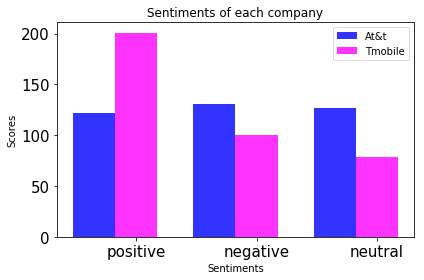

In [110]:
compare_sentiments(summary_att, summary_Tmobile)

In [111]:
def multinomialNB(clean_sentences,label):
    metrics = ["precision_macro", "recall_macro", "f1_macro"]
     # initialize the TfidfVectorizer 
    tfidf_vect = TfidfVectorizer()
    # with stop words removed
    tfidf_vect = TfidfVectorizer(stop_words = "english") 
    # generate tfidf matrix
    dtm = tfidf_vect.fit_transform(clean_sentences).toarray()
    Y= label
    X_train, X_test, y_train, y_test = train_test_split(dtm, Y,test_size = 0.20, random_state = 0)
    clf = MultinomialNB().fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    cv_= cross_validate(clf, dtm,Y,scoring=metrics,cv=8)
    print("Test data set Average Precision:")
    print(cv_['test_precision_macro'])
    print("\nTest data set Average Recall:")
    print(cv_['test_recall_macro'])
    print("\nTest data set Average FScore:")
    print(cv_['test_f1_macro'])
    #accuracy=accuracy_score(text, label)
    #print(accuracy)
    print('\n')
    accuracy = [cross_val_score(clf, dtm, Y, cv=8)]
    print("Accuracy: " + str(accuracy[0]))

    print("Average accuracy: " + str(np.array(accuracy[0]).mean()))
   
   

In [112]:

multinomialNB(clean_sentences_att,label_att)

Test data set Average Precision:
[0.60042735 0.77792302 0.84070175 0.74321267 0.81018519 0.83224401
 0.86236983 0.54386973]

Test data set Average Recall:
[0.43995098 0.73039216 0.75555556 0.69166667 0.78055556 0.7125
 0.84722222 0.49305556]

Test data set Average FScore:
[0.39978355 0.69264069 0.71495405 0.6507177  0.76887629 0.66690157
 0.84630925 0.4654321 ]


Accuracy: [0.44897959 0.73469388 0.77083333 0.70212766 0.78723404 0.72340426
 0.85106383 0.5       ]
Average accuracy: 0.6897920737443914


In [113]:
multinomialNB(clean_sentences_Tmobile,label_Tmobile)

C:\Users\PRIYANKA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PRIYANKA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PRIYANKA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PRIYANKA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PRIYANKA\Anaconda3\lib\site-package

Test data set Average Precision:
[0.17687075 0.5106383  0.17361111 0.5106383  0.17730496 0.17730496
 0.17730496 0.52713178]

Test data set Average Recall:
[0.33333333 0.36666667 0.33333333 0.35897436 0.33333333 0.33333333
 0.33333333 0.38888889]

Test data set Average FScore:
[0.23111111 0.29208754 0.2283105  0.27910053 0.23148148 0.23148148
 0.23148148 0.34033613]


Accuracy: [0.53061224 0.54166667 0.52083333 0.54166667 0.53191489 0.53191489
 0.53191489 0.58695652]
Average accuracy: 0.5396850142693526


In [114]:
def BernoulliNaiveBayes(clean_sentences,label):
        countvector = CountVectorizer(max_features = 1500)
        X =countvector.fit_transform(clean_sentences).toarray()
        Y= label
        X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size = 0.20, random_state = 0)
        # Fitting Bernoulli Naive Bayes model to the training set
        classifier = BernoulliNB().fit(X_train, y_train)
        # Predicting the Test set results
        y_pred = classifier.predict(X_test)
        # Confusion Matrix
       # confmatrix = confusion_matrix(y_test, y_pred)
        #displaying the confusion matrix
        #print("\nConfusion matrix\n",confmatrix)
        # To get performance metrics
        print("Performance Metrics:  \n")
        print(classification_report(y_test, y_pred))
        print(" The ACCURACY of the model: \n")
        accuracy = accuracy_score(y_test, y_pred)
        print(accuracy)
        # import cross validation method
        from sklearn.model_selection import cross_validate
        #from sklearn.metrics import precision_recall_fscore_support
        from sklearn.naive_bayes import MultinomialNB
        metrics = ['precision_macro', 'recall_macro', "f1_macro"]
        classifier = BernoulliNB(alpha=0.8)
        crossvalidate = cross_validate(classifier, X, Y, scoring=metrics, cv=8)

        print("Test data set average precision:  \n ")
        print(crossvalidate['test_precision_macro'])

        print("\nTest data set average recall:  \n")
        print(crossvalidate['test_recall_macro'])

        print("\nTest data set average fscore: \n")
        print(crossvalidate['test_f1_macro'])

        # To see the performance of training data set use 
        print(crossvalidate['train_f1_macro'])

        #To check the accuracy
        accuracy = [cross_val_score(classifier, X, Y, cv=8)]
        print("Accuracy: " + str(accuracy[0]))

        print("Average accuracy: " + str(np.array(accuracy[0]).mean()))

In [115]:
BernoulliNaiveBayes(clean_sentences_att,label_att)

Performance Metrics:  

             precision    recall  f1-score   support

          1       0.54      0.68      0.60        19
          2       0.81      0.70      0.75        30
          3       0.85      0.81      0.83        27

avg / total       0.75      0.74      0.74        76

 The ACCURACY of the model: 

0.7368421052631579
Test data set average precision:  
 
[0.64631579 0.65964912 0.73368984 0.67226891 0.75777778 0.73420479
 0.8405303  0.63800905]

Test data set average recall:  

[0.50735294 0.67401961 0.74379085 0.675      0.71944444 0.74444444
 0.83055556 0.47638889]

Test data set average fscore: 

[0.50877533 0.65384615 0.73068544 0.65697516 0.71159117 0.73336835
 0.82277977 0.45553092]
[0.8951414  0.87617515 0.88664665 0.88927822 0.87722026 0.86764673
 0.87985243 0.91628095]
Accuracy: [0.51020408 0.67346939 0.75       0.68085106 0.72340426 0.74468085
 0.82978723 0.47826087]
Average accuracy: 0.6738322179010365


C:\Users\PRIYANKA\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_f1_macro'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [116]:
BernoulliNaiveBayes(clean_sentences_Tmobile,label_Tmobile)

Performance Metrics:  

             precision    recall  f1-score   support

          1       0.75      0.54      0.63        39
          2       0.62      0.26      0.37        19
          3       0.35      0.78      0.48        18

avg / total       0.62      0.53      0.53        76

 The ACCURACY of the model: 

0.5263157894736842
Test data set average precision:  
 
[0.46578832 0.55015063 0.63888889 0.38440066 0.48875661 0.5693816
 0.64197531 0.40542328]

Test data set average recall:  

[0.51794872 0.60153846 0.61025641 0.44564103 0.47222222 0.57555556
 0.44888889 0.45555556]

Test data set average fscore: 

[0.4440133  0.54733583 0.53594771 0.34472934 0.45073768 0.49074074
 0.40741073 0.37422969]
[0.69341686 0.72330185 0.71080371 0.71295409 0.7021567  0.69858125
 0.71392101 0.71431545]
Accuracy: [0.46938776 0.5625     0.58333333 0.39583333 0.44680851 0.55319149
 0.44680851 0.36956522]
Average accuracy: 0.47842851872478875


C:\Users\PRIYANKA\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_f1_macro'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [117]:
df_att = pd.read_csv('att_facebook_comments.csv')
posts = df_att["comment_message"]
posts_list_att=list(posts)
post_sentences_att=[]
for post in posts_list_att:
    post_sentences_att.append(str(post))

    

In [120]:
df_tmobile = pd.read_csv('tmobile_facebook_comments.csv')
posts1 = df_tmobile["comment_message"]
posts_list_tmobile=list(posts1)
post_sentences_tmobile=[]
for post in posts_list_tmobile:
    post_sentences_tmobile.append(str(post))


In [121]:
clean_sentences_att_train=cleanup_data(post_sentences_att)
clean_sentences_tmobile_train=cleanup_data(post_sentences_tmobile)

In [122]:
summary_at,sentences_at,label_at=sentiment_analysis_VADERAnalyser(clean_sentences_att_train)
summary_posts_att,sentences_posts_att,label_posts_att=sentiment_analysis_VADERAnalyser(post_sentences_att)
summary_tmobile,sentences_tmobile,label_tmobile=sentiment_analysis_VADERAnalyser(clean_sentences_tmobile_train)
summary_post_tmobile,sentences_post_tmobile,label_post_tmobile=sentiment_analysis_VADERAnalyser(post_sentences_tmobile)

print(summary_at)
print(summary_posts_att)
print(summary_tmobile)
print(summary_post_tmobile)


{'positive': 1236, 'neutral': 751, 'negative': 1572}
{'positive': 1216, 'neutral': 777, 'negative': 1566}
{'positive': 2589, 'neutral': 2354, 'negative': 1394}
{'positive': 2483, 'neutral': 2494, 'negative': 1360}


h:


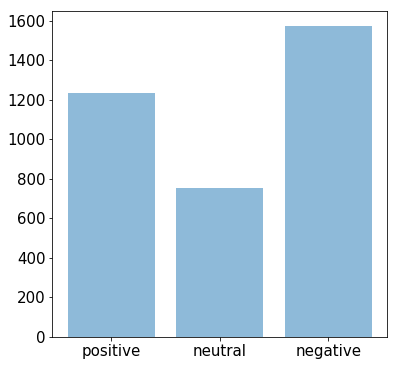

In [123]:
plot_Sentiment(summary_at)


h:


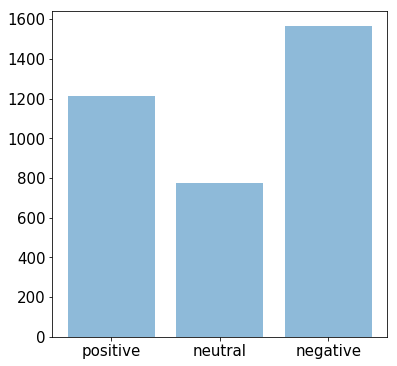

In [124]:
plot_Sentiment(summary_posts_att)


h:


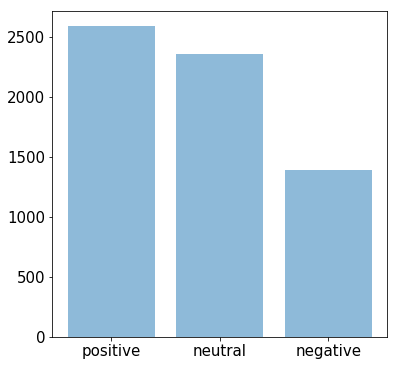

In [125]:
plot_Sentiment(summary_tmobile)


h:


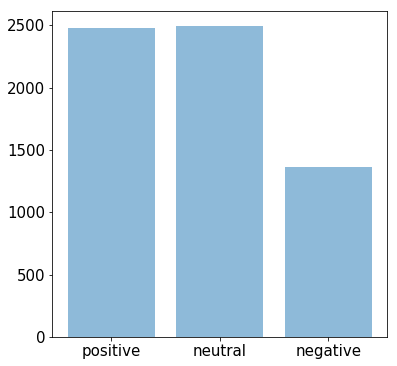

In [126]:
plot_Sentiment(summary_post_tmobile)


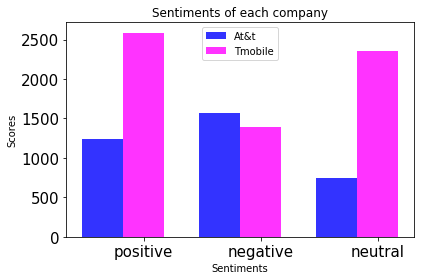

In [127]:
compare_sentiments(summary_at, summary_tmobile)

In [128]:
BernoulliNaiveBayes(sentences_at,label_at)


Performance Metrics:  

             precision    recall  f1-score   support

          1       0.73      0.46      0.56       233
          2       0.80      0.53      0.64       324
          3       0.42      0.94      0.58       155

avg / total       0.69      0.60      0.60       712

 The ACCURACY of the model: 

0.5969101123595506
Test data set average precision:  
 
[0.67195135 0.641841   0.69192413 0.66508341 0.58354666 0.56858908
 0.54588704 0.58554835]

Test data set average recall:  

[0.67760621 0.64841567 0.63922798 0.64121651 0.59315254 0.56609626
 0.58063922 0.58697076]

Test data set average fscore: 

[0.6322675  0.59900794 0.58284632 0.58517988 0.53534011 0.50028874
 0.50847562 0.54471512]
[0.62637975 0.61789105 0.63300684 0.61869138 0.61971733 0.62143385
 0.62356914 0.63815315]


C:\Users\PRIYANKA\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_f1_macro'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


Accuracy: [0.6367713  0.60538117 0.58520179 0.5896861  0.54279279 0.51126126
 0.54279279 0.56207675]
Average accuracy: 0.5719954943783634


In [129]:
BernoulliNaiveBayes(sentences_tmobile,label_tmobile)

Performance Metrics:  

             precision    recall  f1-score   support

          1       0.78      0.51      0.62       514
          2       0.51      0.53      0.52       277
          3       0.64      0.87      0.74       477

avg / total       0.67      0.65      0.64      1268

 The ACCURACY of the model: 

0.6490536277602523
Test data set average precision:  
 
[0.63912973 0.64966118 0.65809066 0.68752619 0.65690412 0.69666523
 0.71587218 0.72748054]

Test data set average recall:  

[0.62767475 0.62944579 0.63573658 0.68393339 0.65639236 0.67981215
 0.71071659 0.72072677]

Test data set average fscore: 

[0.61089833 0.60884726 0.61078673 0.6765192  0.64143945 0.65998572
 0.69750881 0.72191985]
[0.68965459 0.69511606 0.69864295 0.69930192 0.69747352 0.6964175
 0.69240227 0.69678976]


C:\Users\PRIYANKA\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_f1_macro'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


Accuracy: [0.63350126 0.63476071 0.63383838 0.6969697  0.66540404 0.67762326
 0.71681416 0.73198483]
Average accuracy: 0.6738620420329617


In [130]:
multinomialNB(sentences_at,label_at)

Test data set Average Precision:
[0.71159657 0.78790753 0.75791517 0.76022965 0.72712326 0.58743909
 0.64710747 0.73962243]

Test data set Average Recall:
[0.6176319  0.58321587 0.60339246 0.57879947 0.5339511  0.46808182
 0.4616245  0.55512831]

Test data set Average FScore:
[0.62518465 0.59281253 0.59422553 0.56606984 0.53956584 0.4394769
 0.44303283 0.5672547 ]


Accuracy: [0.69506726 0.66591928 0.69955157 0.67488789 0.61036036 0.56531532
 0.54279279 0.6275395 ]
Average accuracy: 0.6351792476028854


In [131]:
multinomialNB(sentences_tmobile,label_tmobile)

Test data set Average Precision:
[0.80660556 0.78697973 0.79001243 0.80554318 0.79254498 0.79716354
 0.80980774 0.79655147]

Test data set Average Recall:
[0.61038661 0.65032404 0.63592338 0.63265741 0.63280583 0.6704464
 0.66928756 0.57719264]

Test data set Average FScore:
[0.6230521  0.65844534 0.64837324 0.64771865 0.64525305 0.6843273
 0.68807581 0.58028032]


Accuracy: [0.66876574 0.71410579 0.69444444 0.68686869 0.69318182 0.72692794
 0.71554994 0.64348925]
Average accuracy: 0.6929167020292246
